In [1]:
import cv2
import alimg
import add_prefix
import predict2labelme_json
import label2coco
import split_data
import train
import tool
from video_player import VideoPlayer
from ultralytics import YOLO
import train
from video_player import VideoPlayer
import predict2labelme_json
import video2img



In [9]:
# 將labelme處理的資料變成Yolo模型訓練格式

labelme_folder = "./datas/labelme"
export_dir = "./datas/yolo/base"
label_txt = "label.txt"

label2coco.main(labelme_folder, export_dir,label_txt)

Creating dataset: ./datas/yolo/base
Generating dataset from: ./datas/labelme\wb_01yellow00000000.json
Generating dataset from: ./datas/labelme\wb_01yellow00000001.json
Generating dataset from: ./datas/labelme\wb_01yellow00000002.json
Generating dataset from: ./datas/labelme\wb_01yellow00000003.json
Generating dataset from: ./datas/labelme\wb_01yellow00000004.json
Generating dataset from: ./datas/labelme\wb_01yellow00000005.json
Generating dataset from: ./datas/labelme\wb_01yellow00000006.json
Generating dataset from: ./datas/labelme\wb_01yellow00000007.json
Generating dataset from: ./datas/labelme\wb_01yellow00000008.json
Generating dataset from: ./datas/labelme\wb_01yellow00000009.json
Generating dataset from: ./datas/labelme\wb_01yellow00000010.json
Generating dataset from: ./datas/labelme\wb_01yellow00000011.json
Generating dataset from: ./datas/labelme\wb_01yellow00000012.json
Generating dataset from: ./datas/labelme\wb_01yellow00000013.json
Generating dataset from: ./datas/labelme

Transforming images and labels...


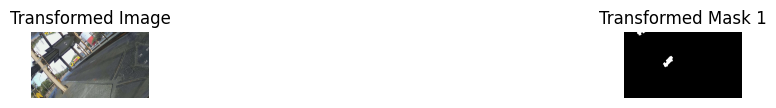

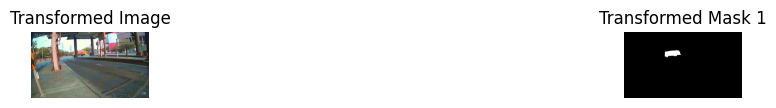

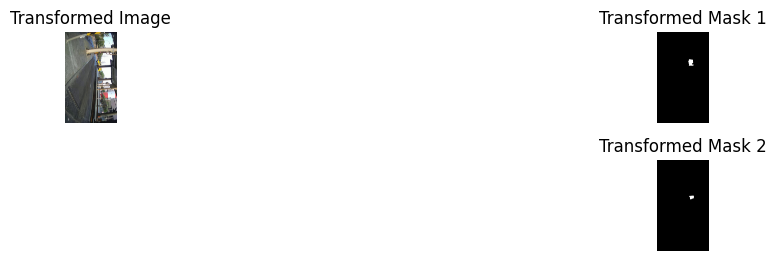

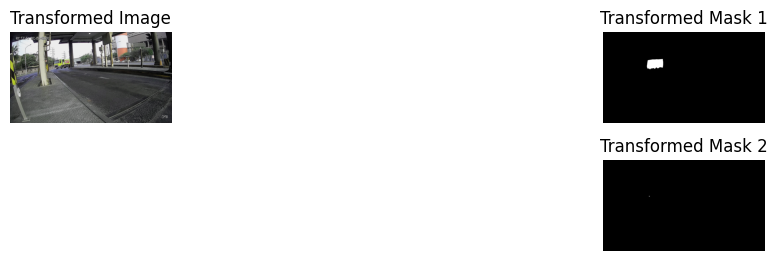

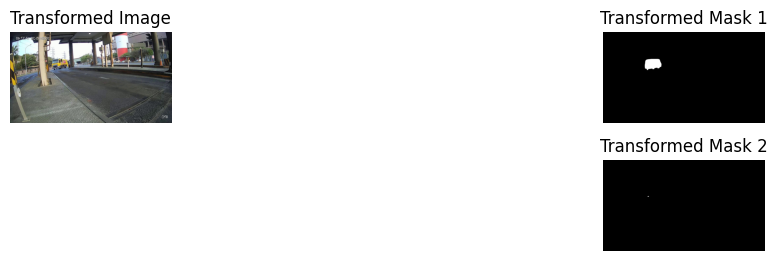

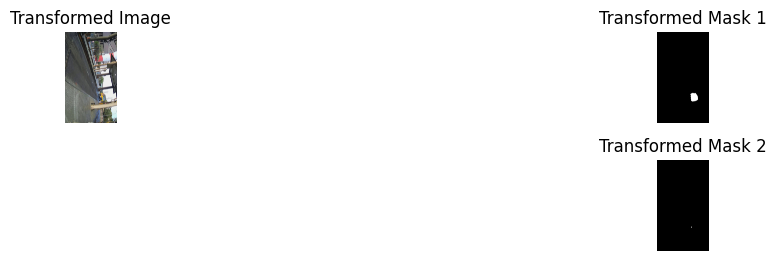

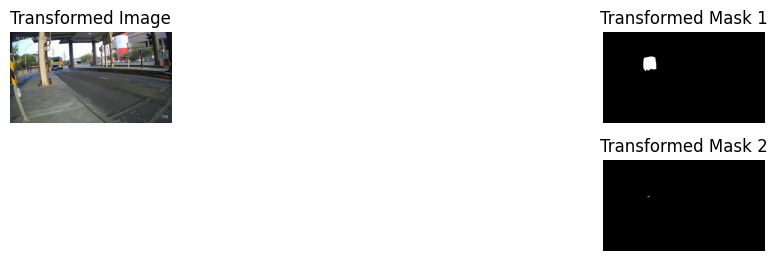

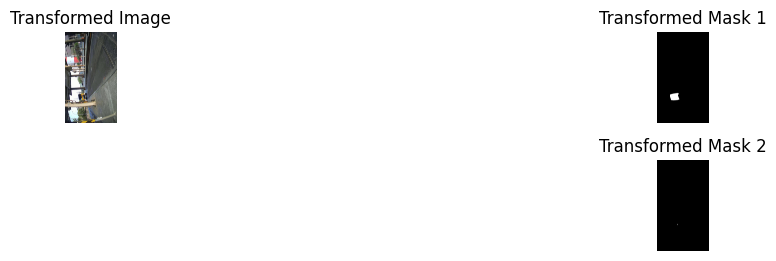

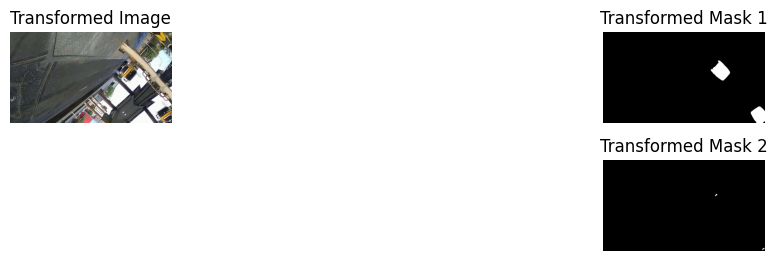

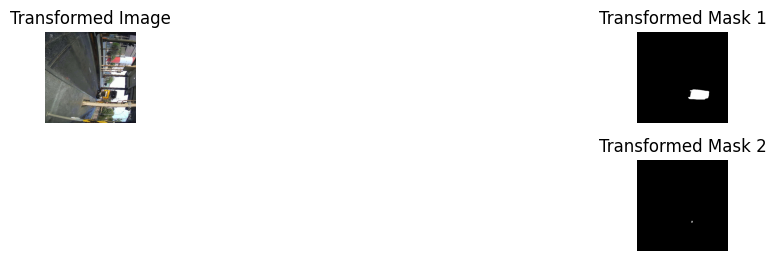

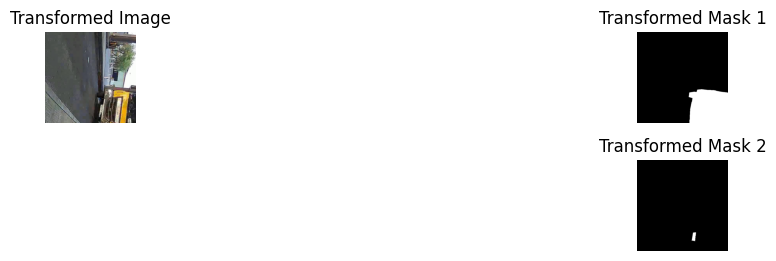

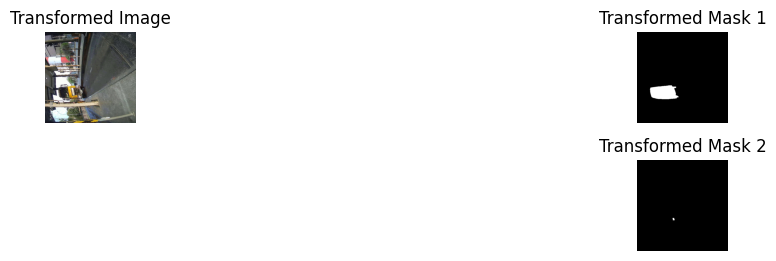

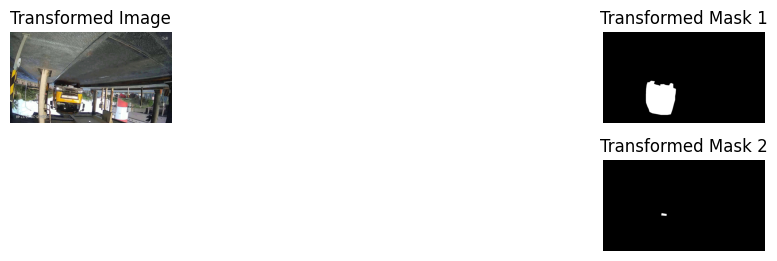

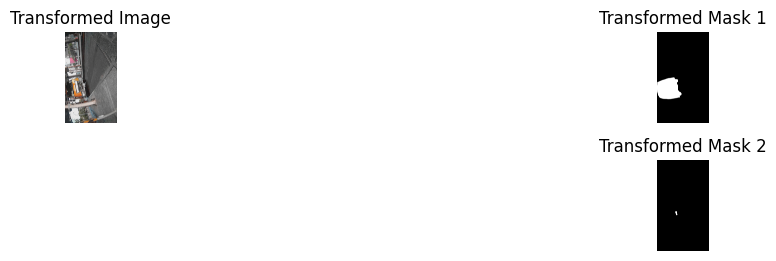

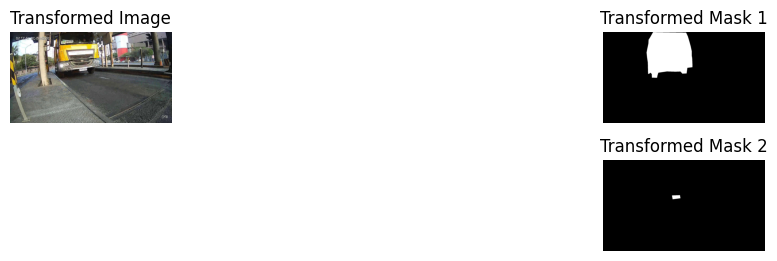

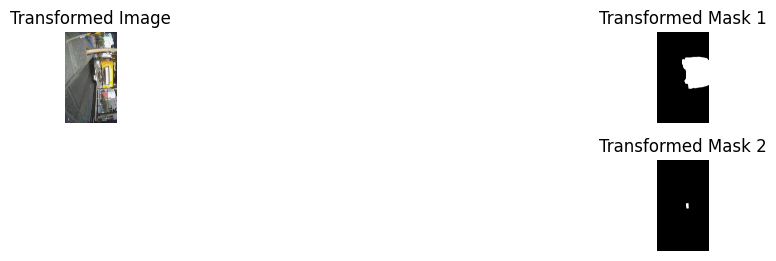

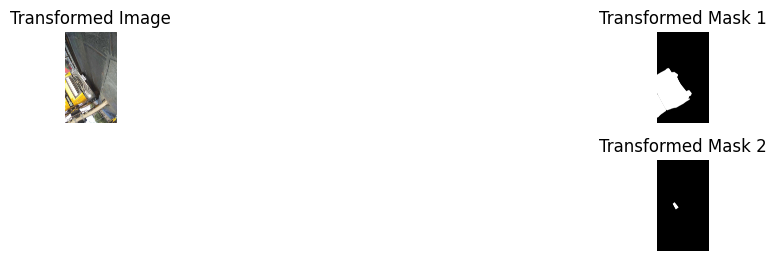

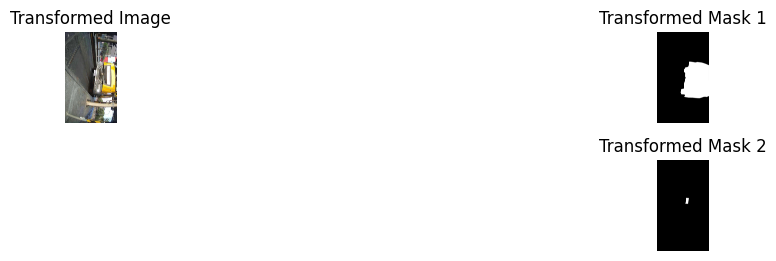

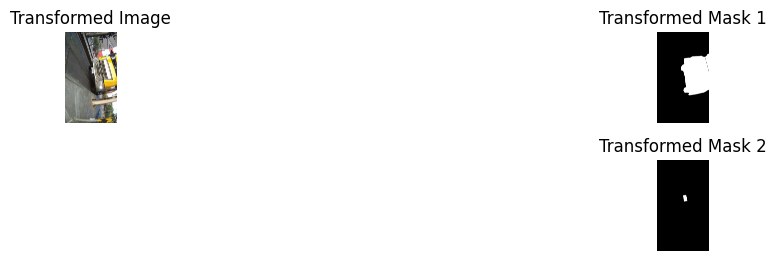

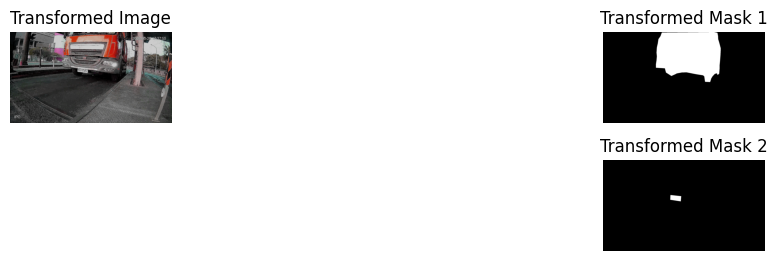

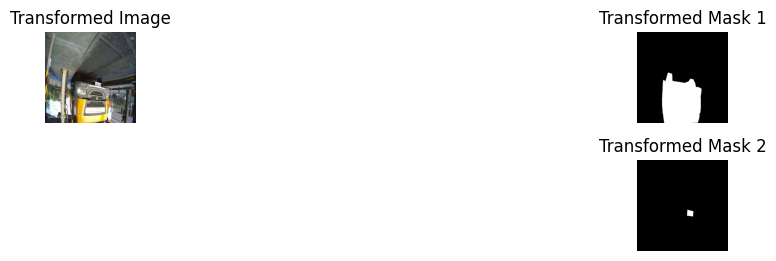

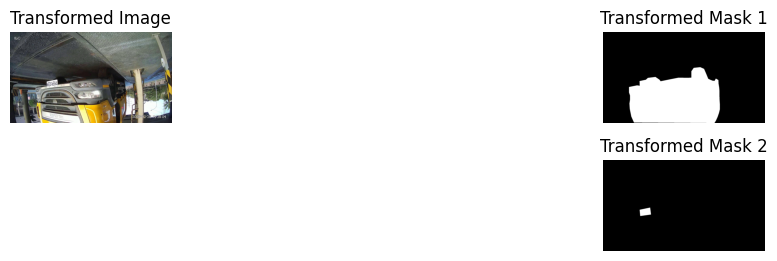

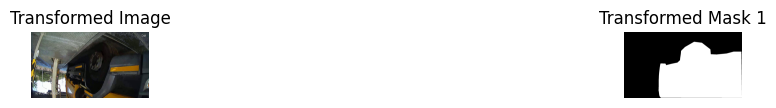

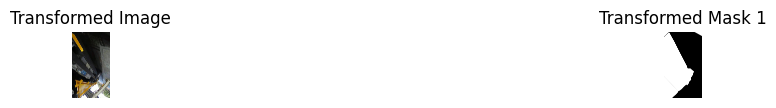

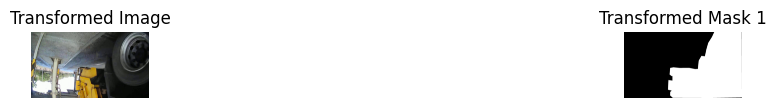

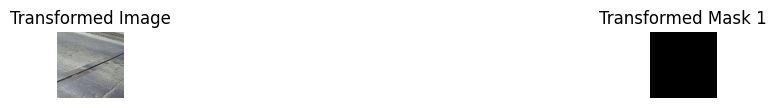

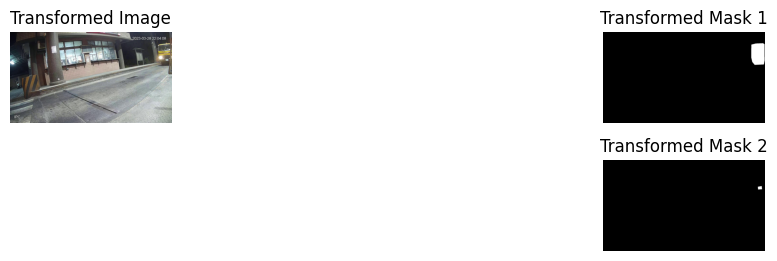

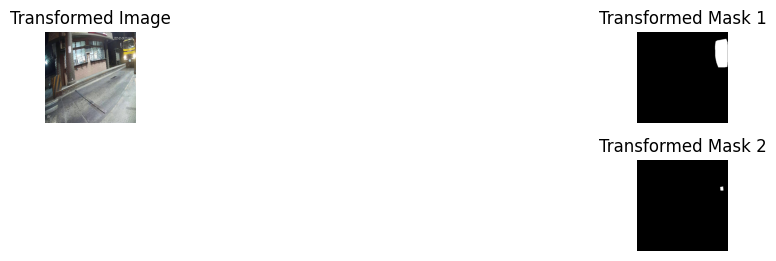

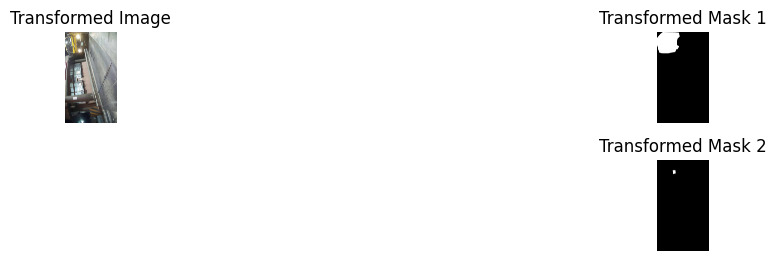

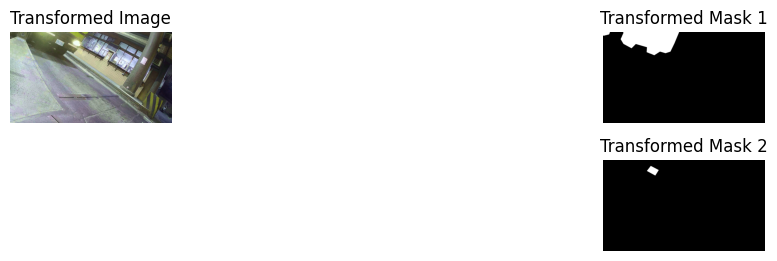

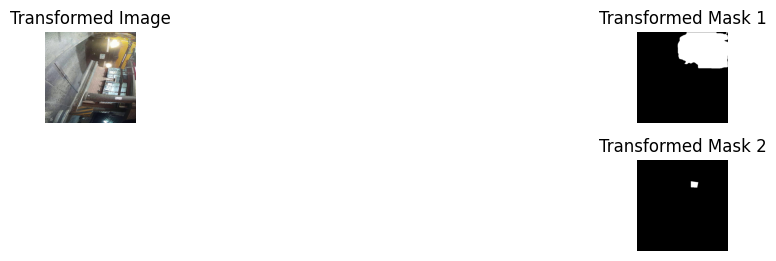

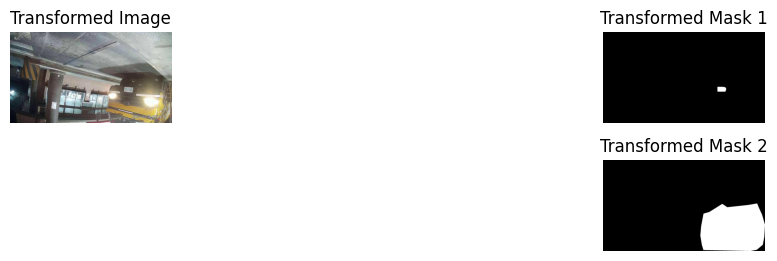

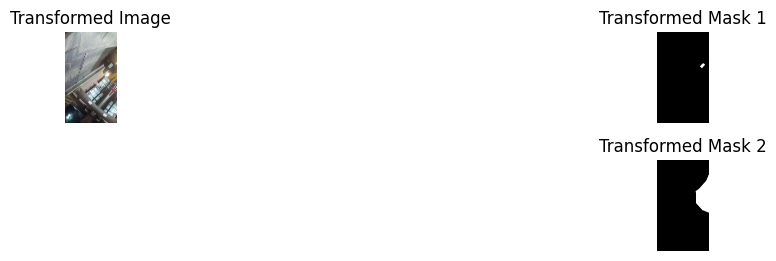

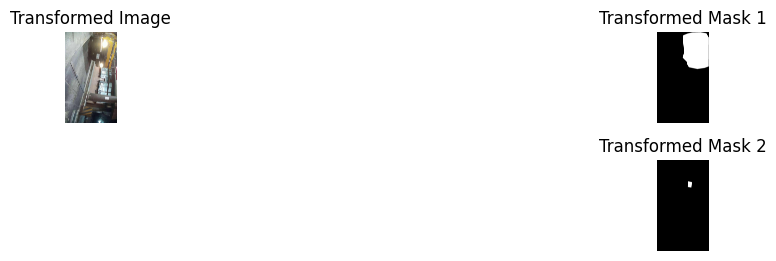

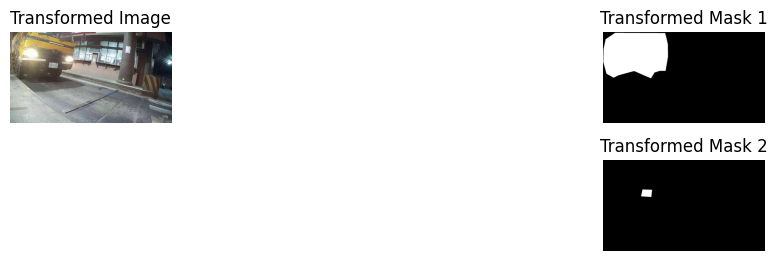

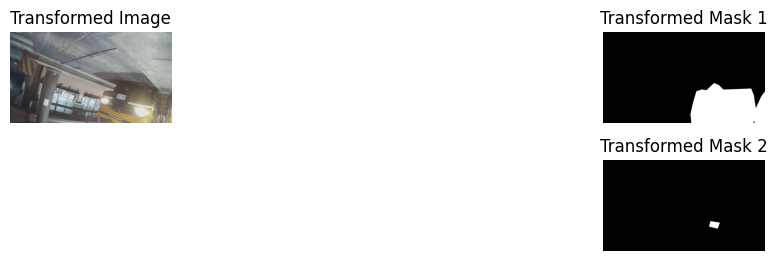

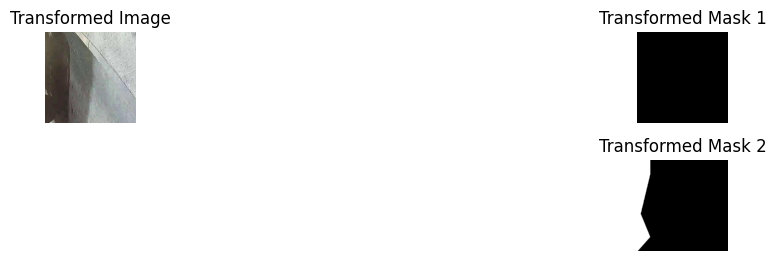

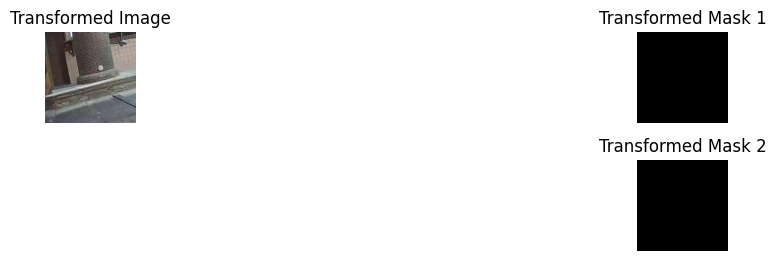

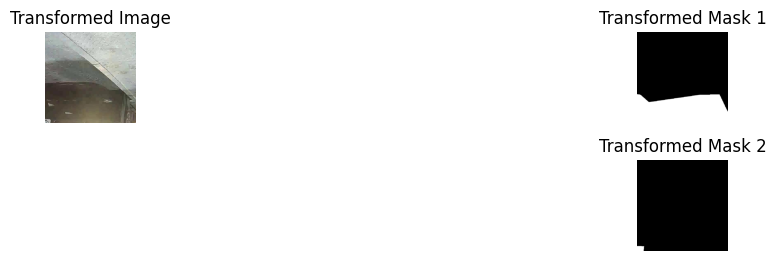

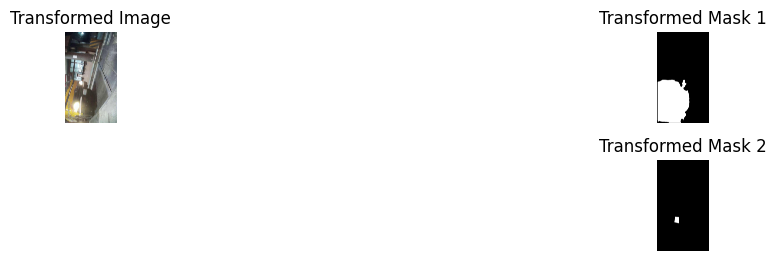

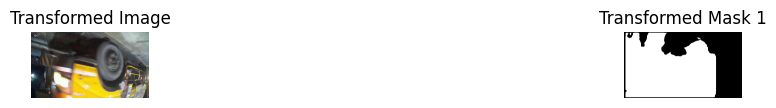

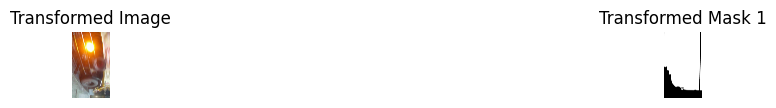

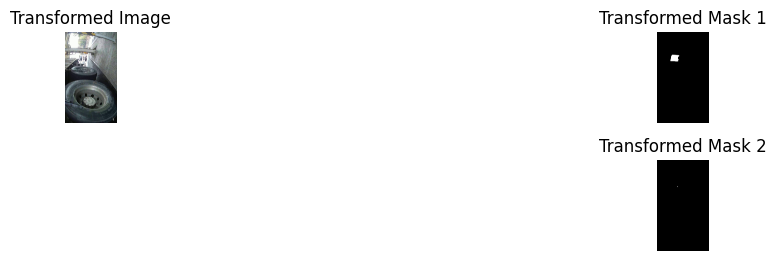

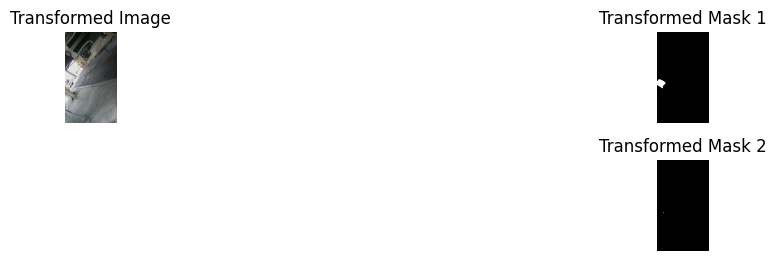

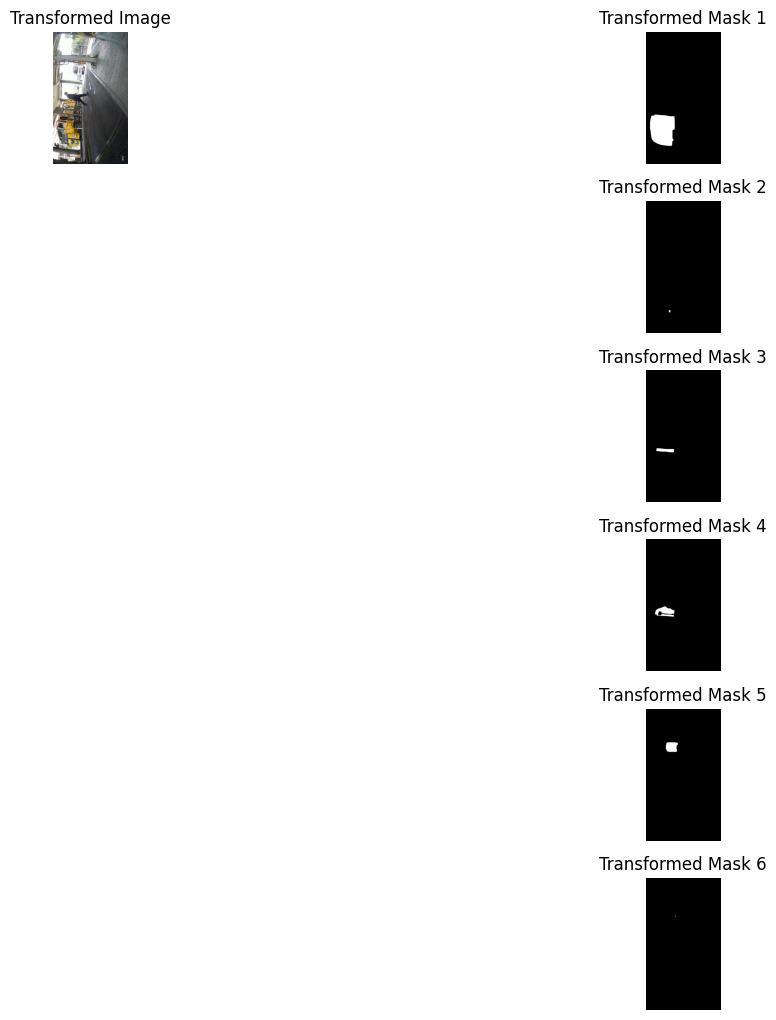

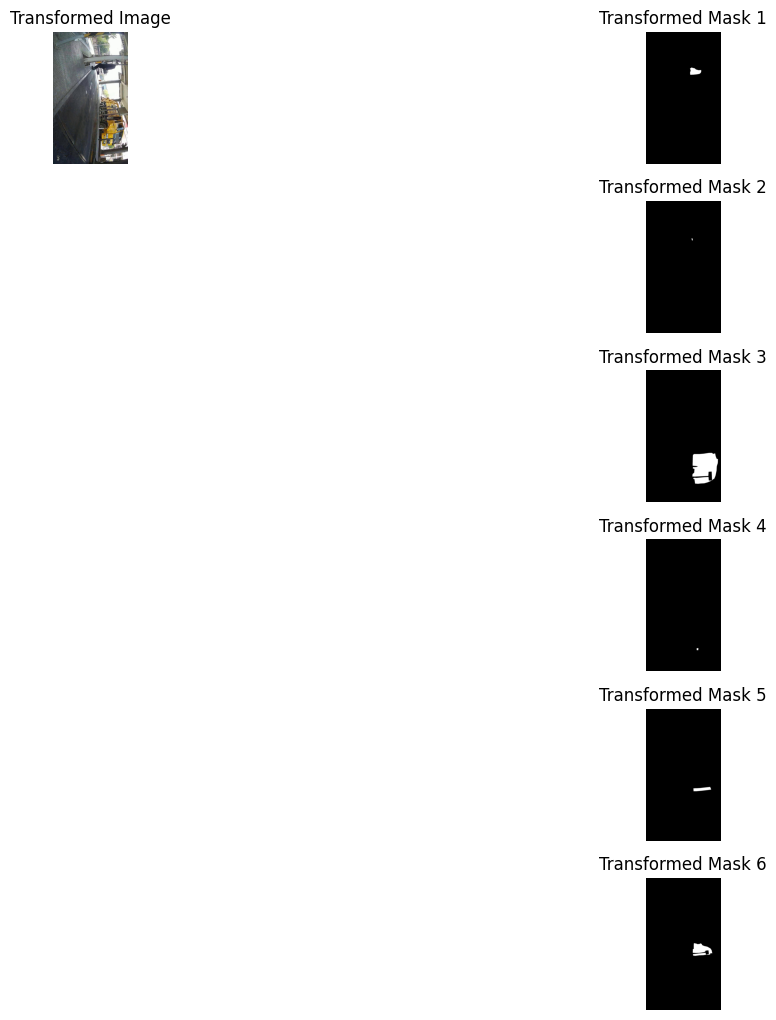

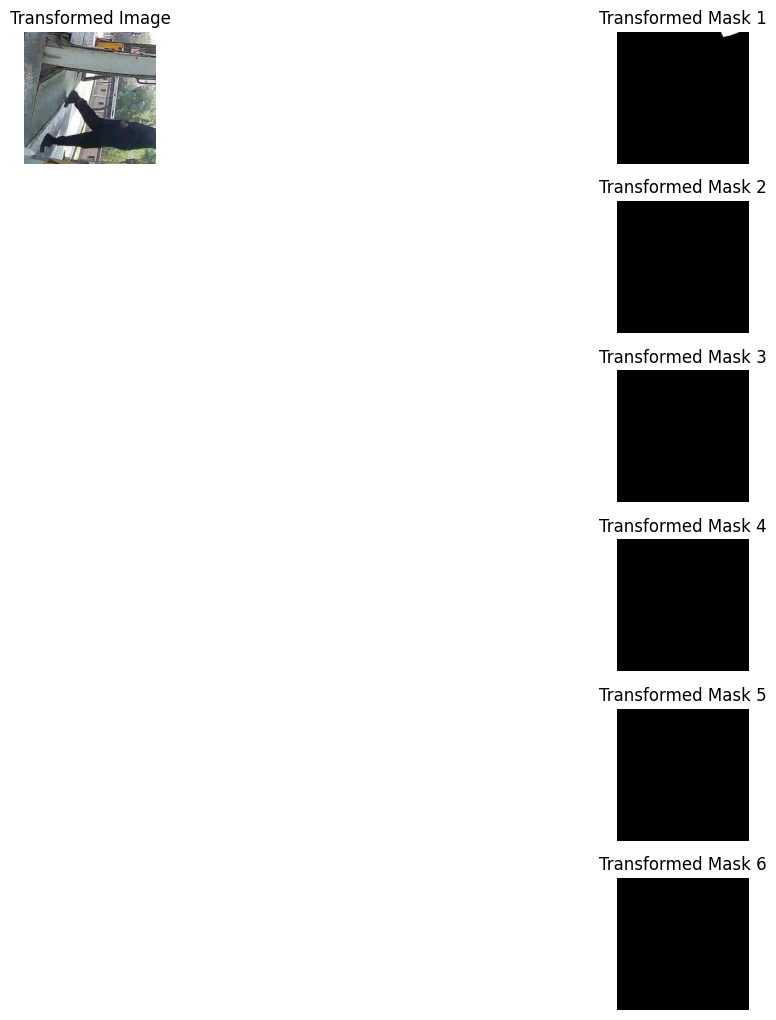

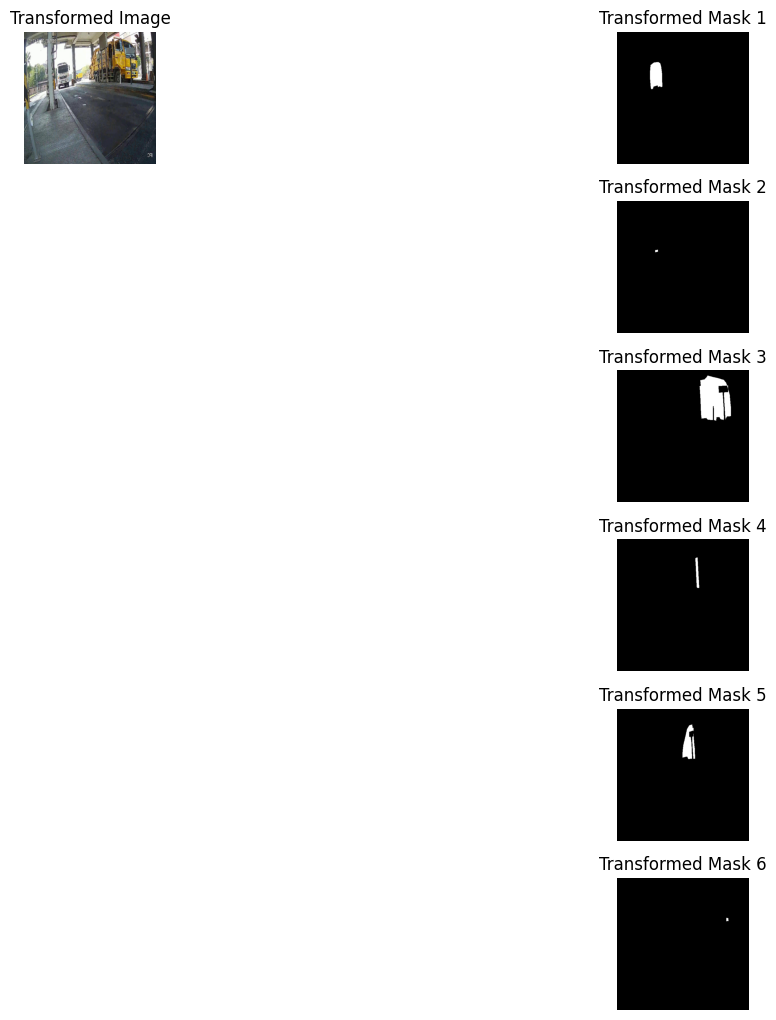

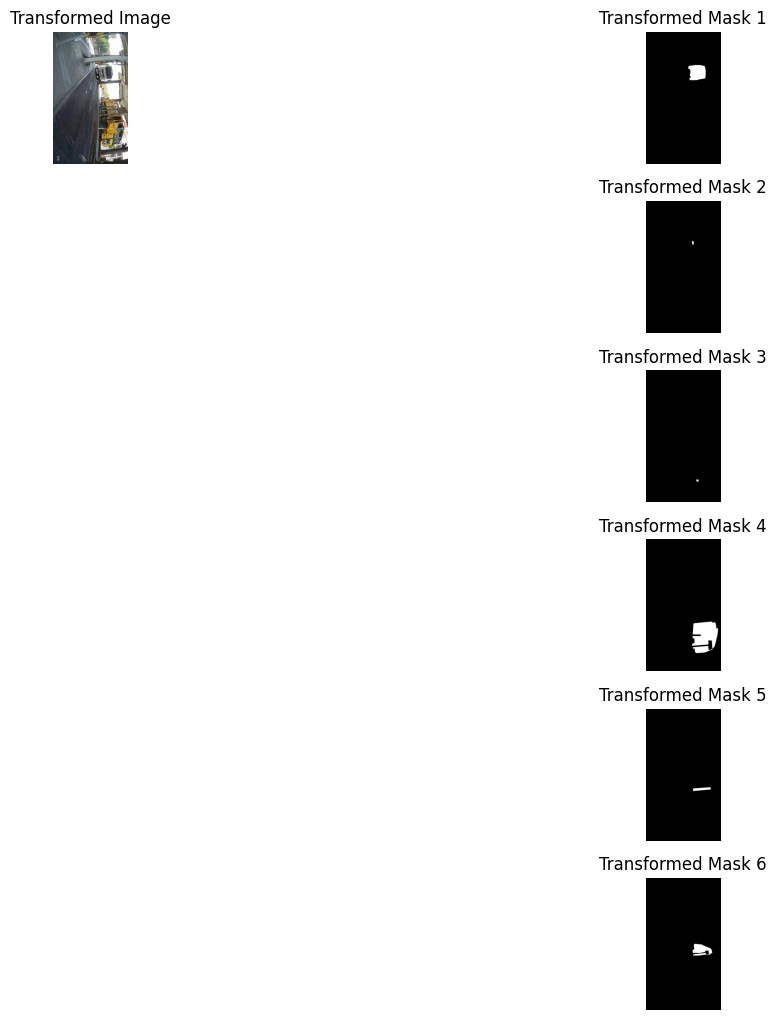

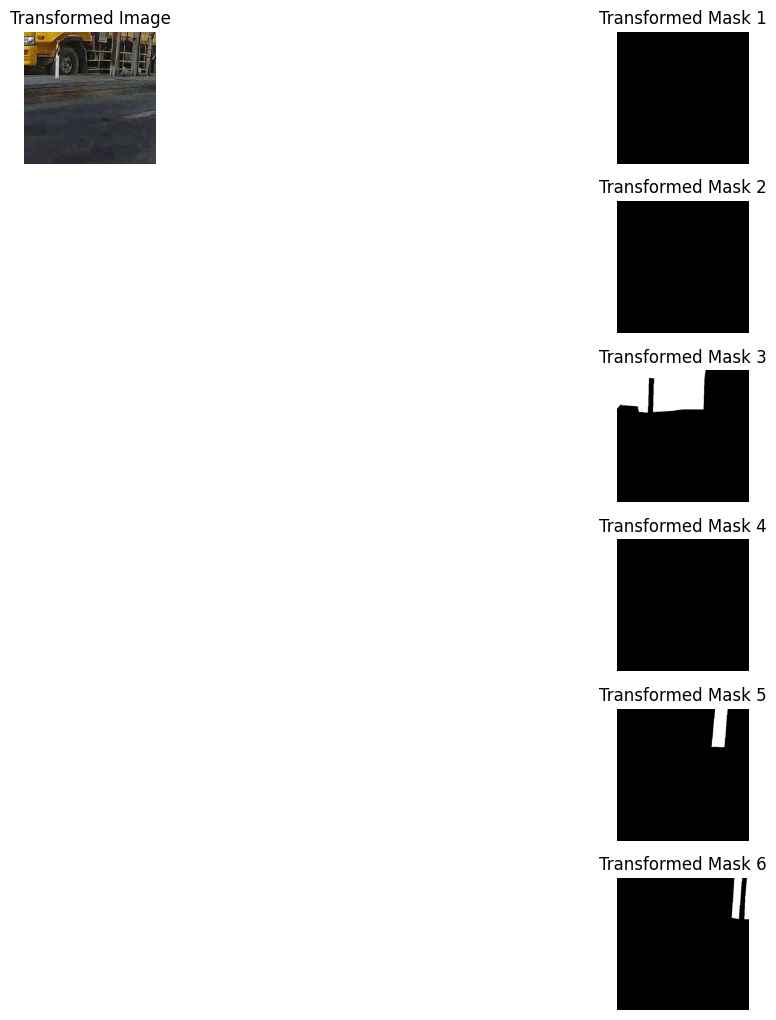

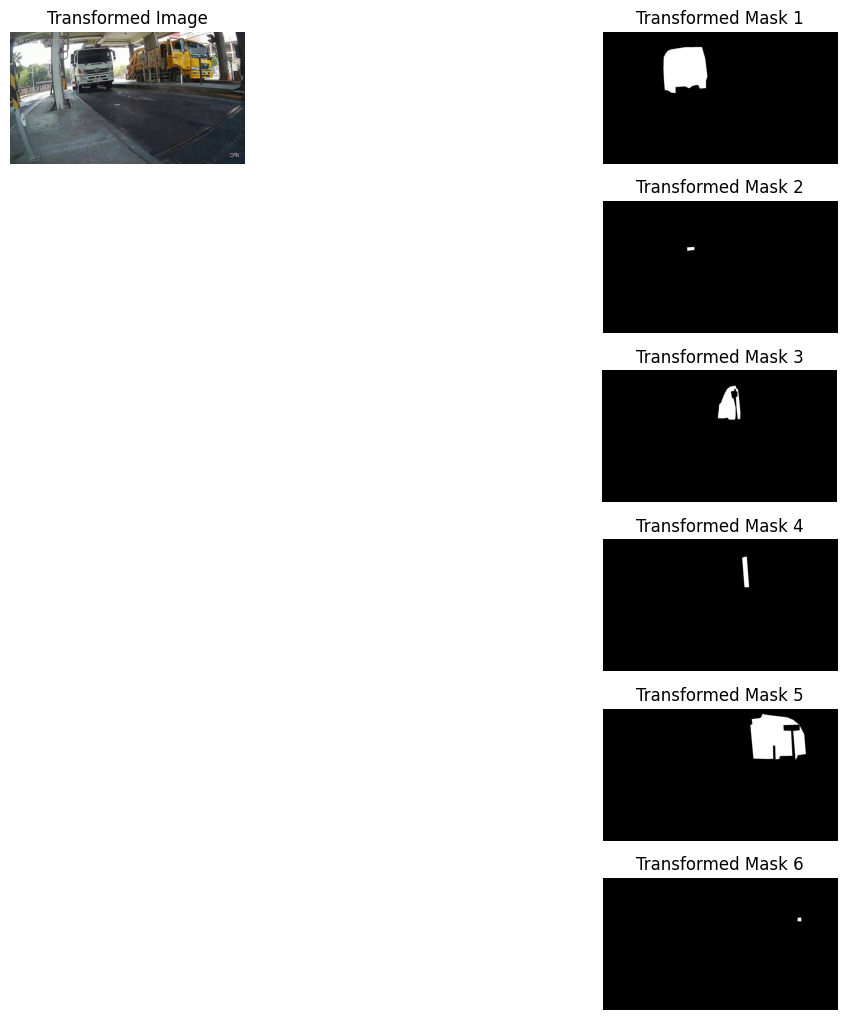

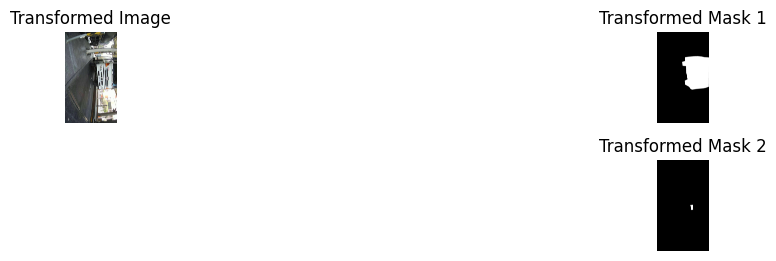

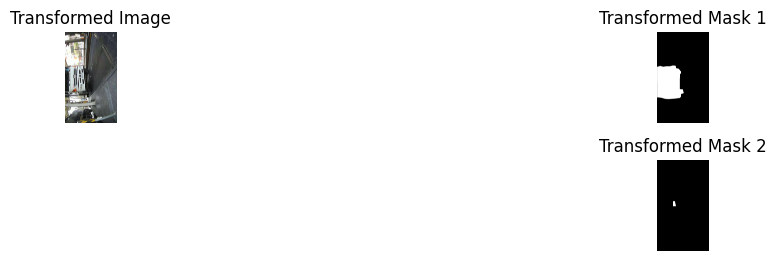

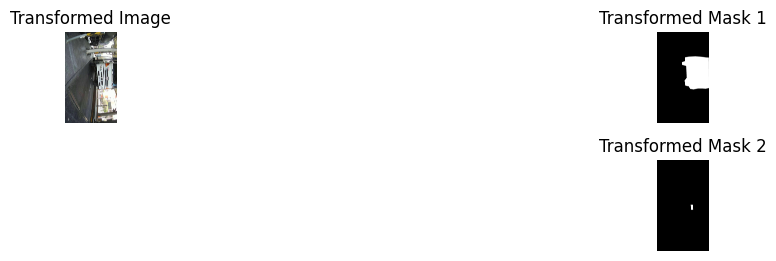

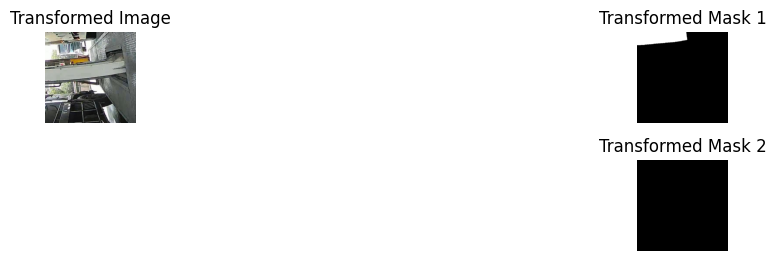

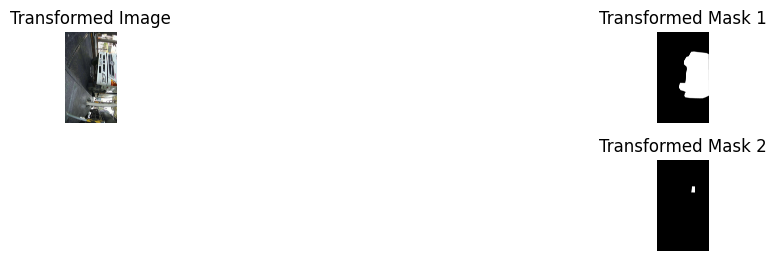

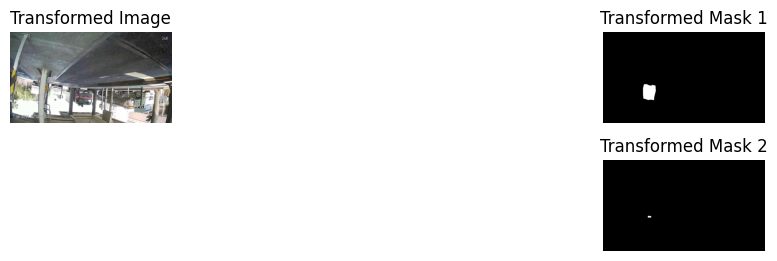

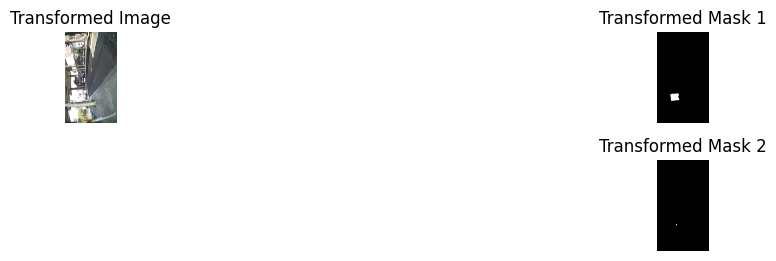

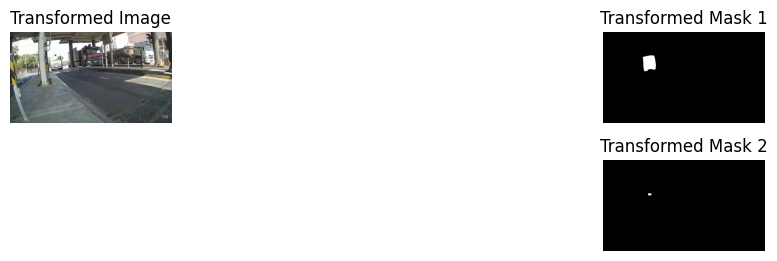

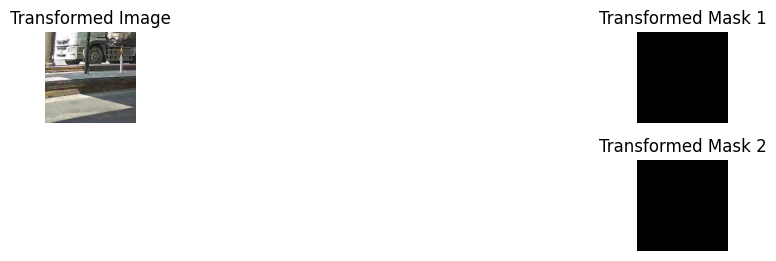

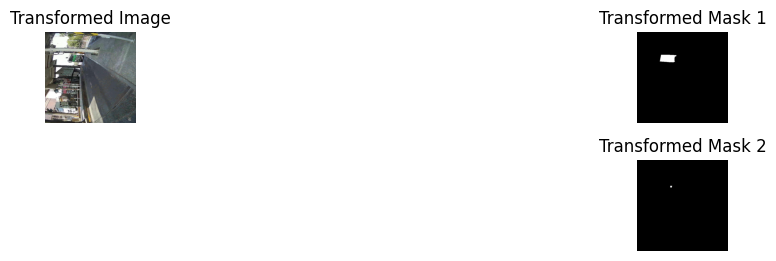

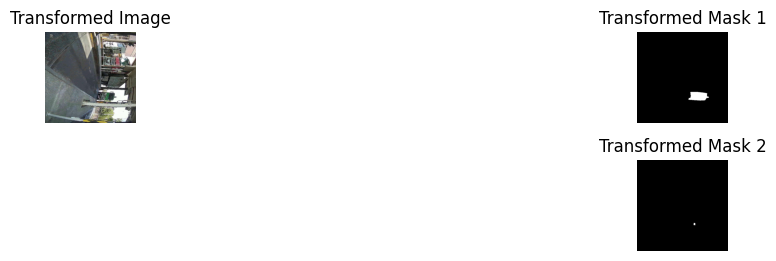

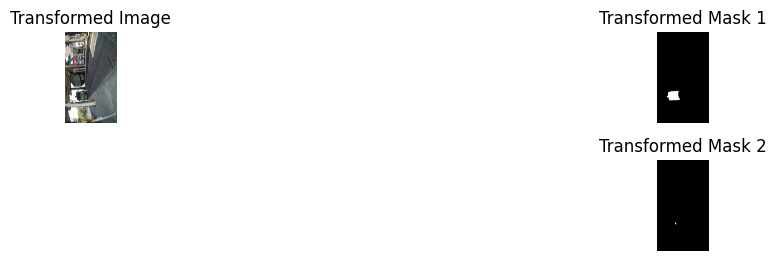

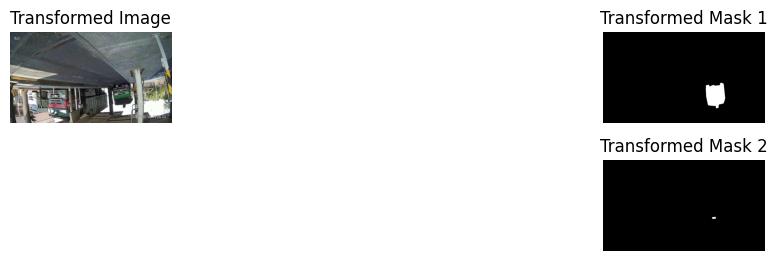

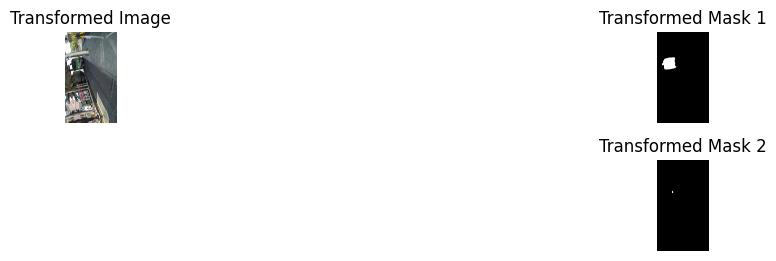

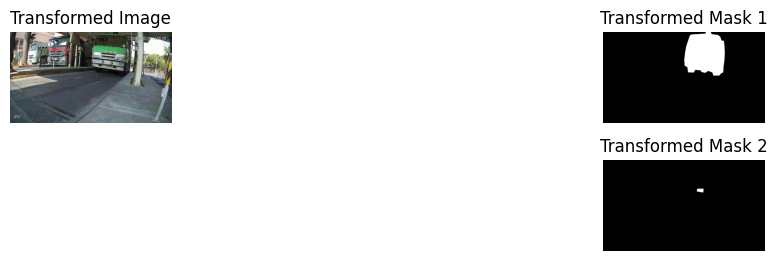

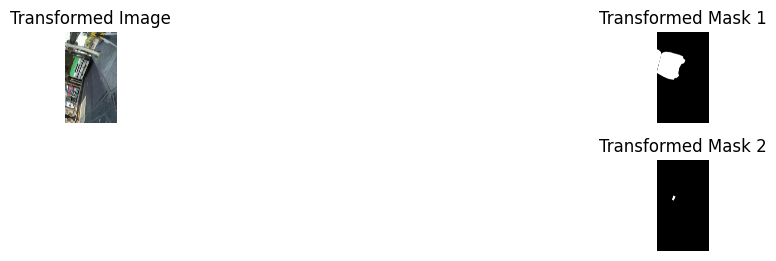

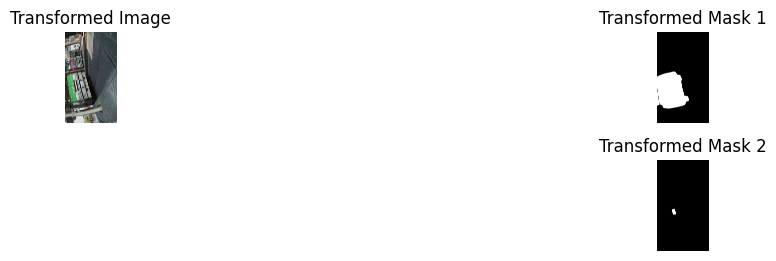

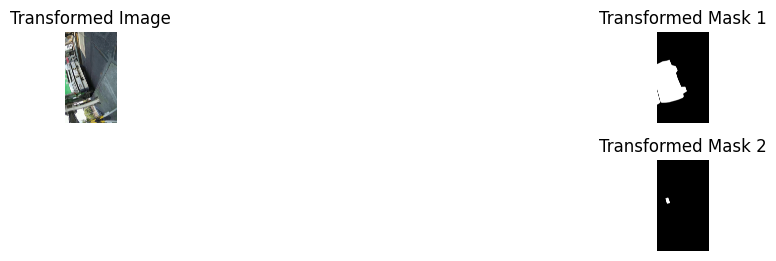

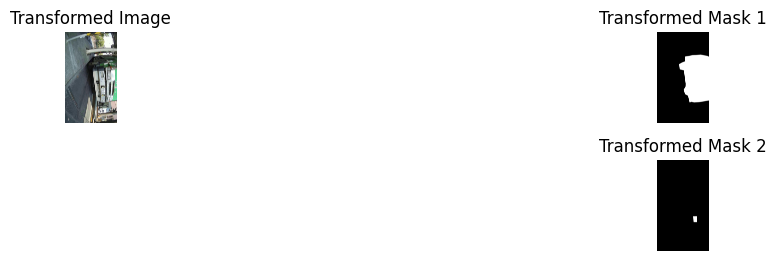

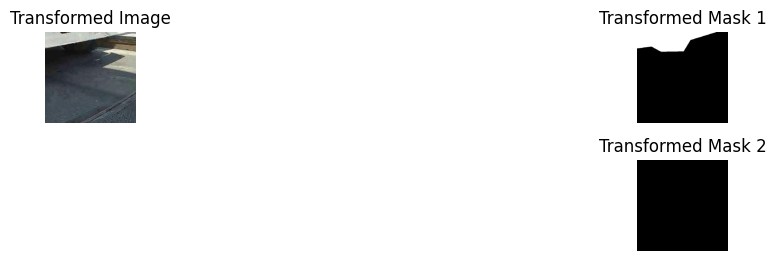

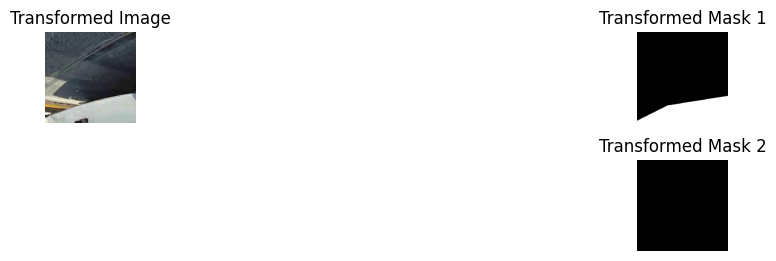

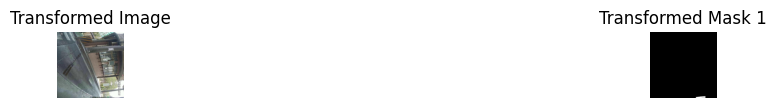

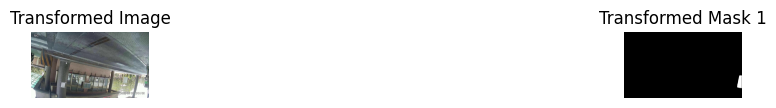

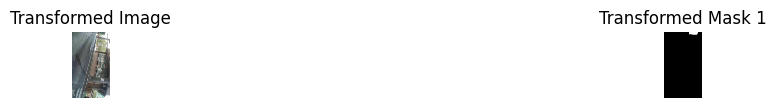

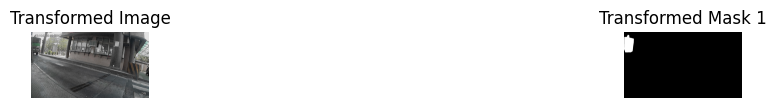

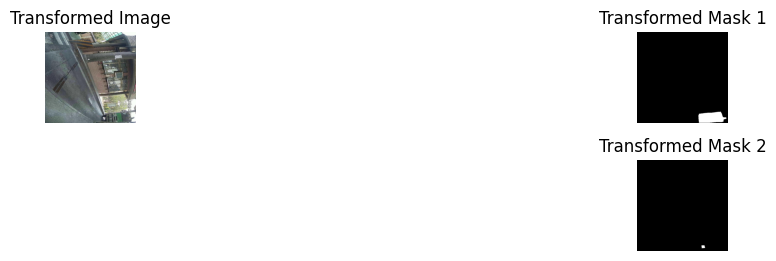

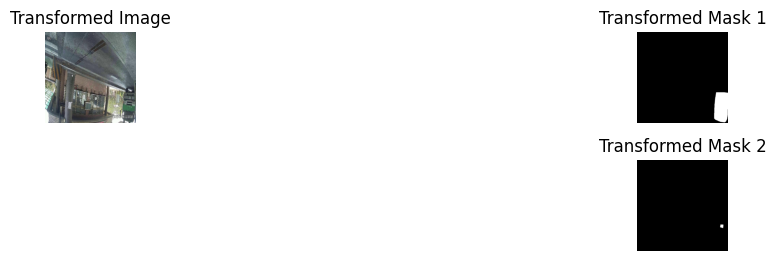

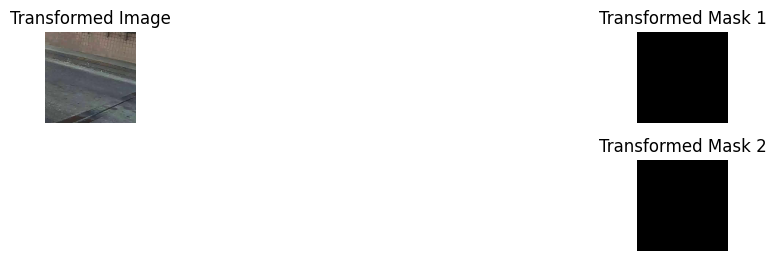

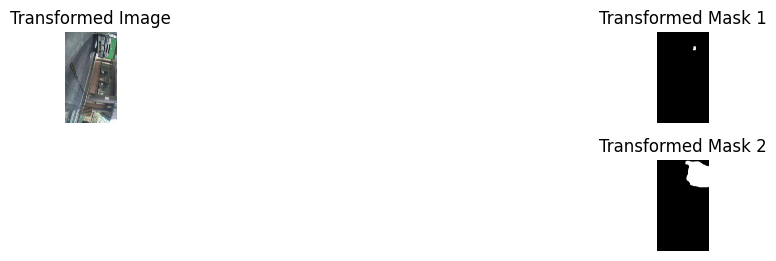

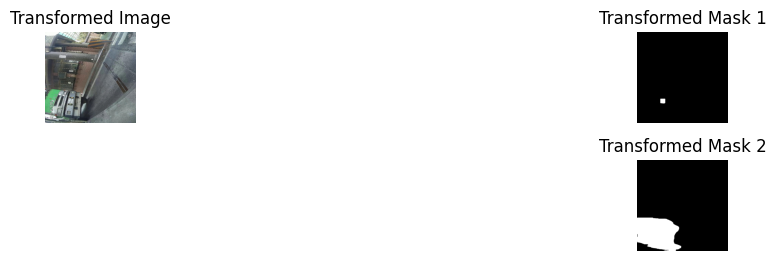

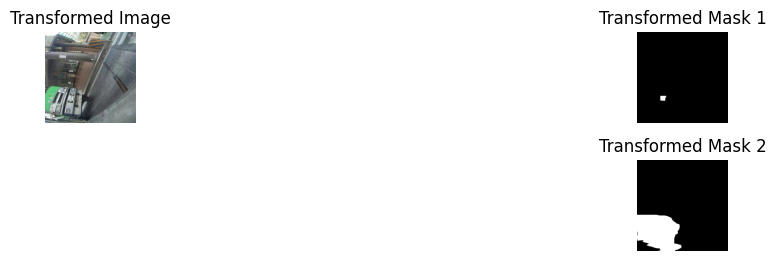

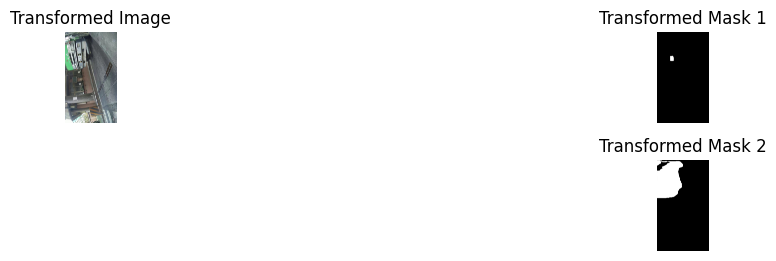

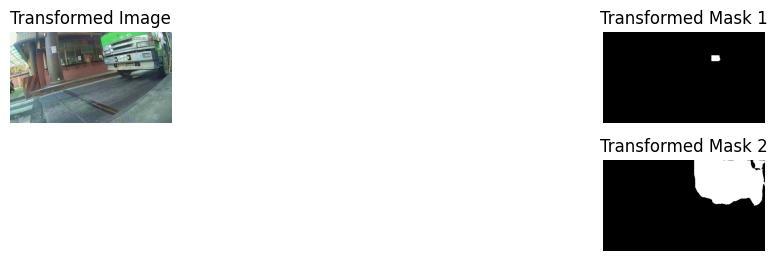

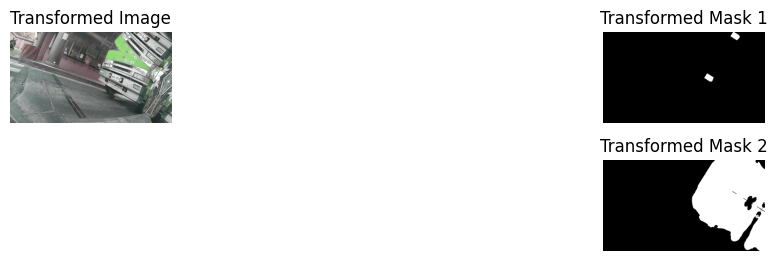

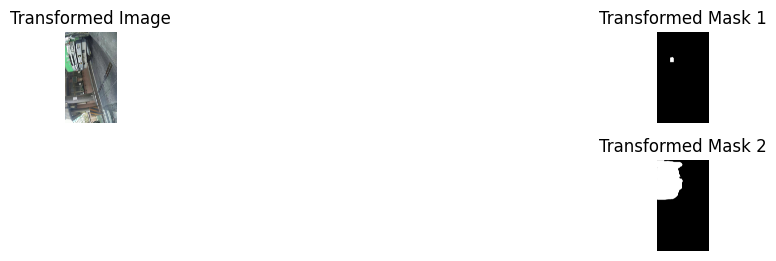

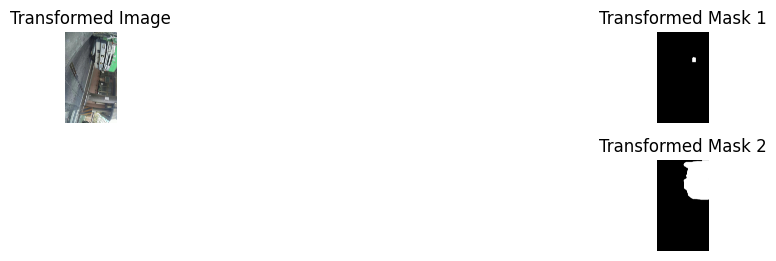

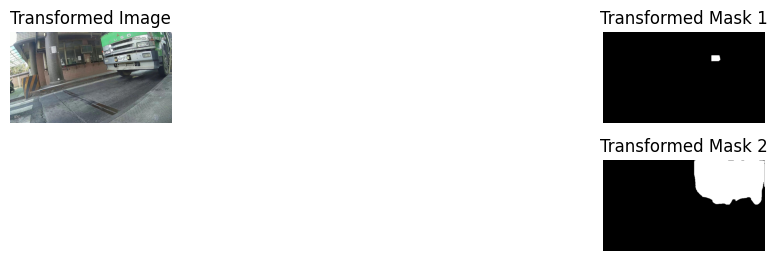

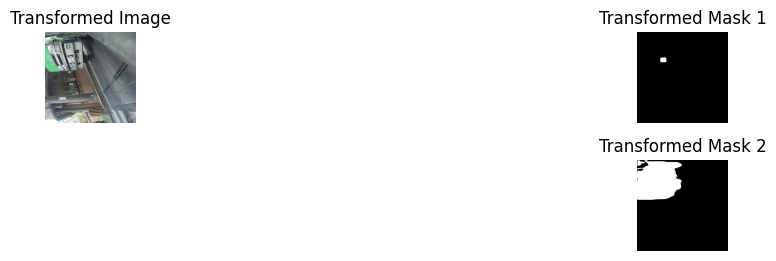

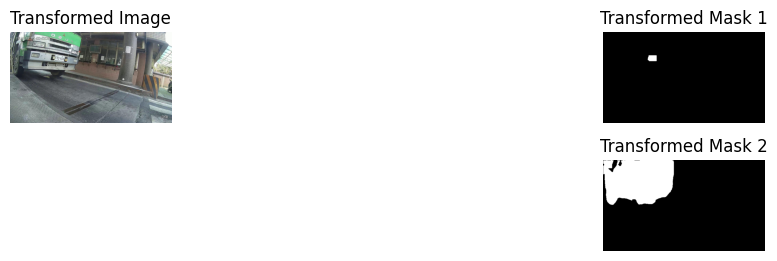

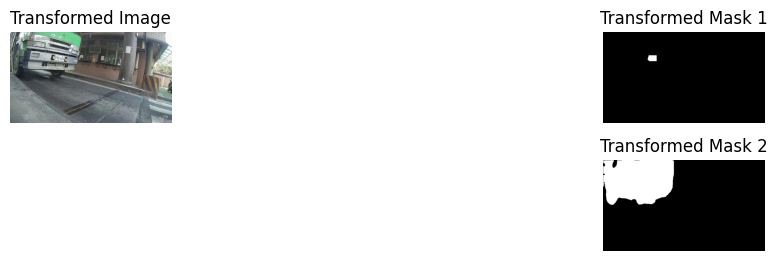

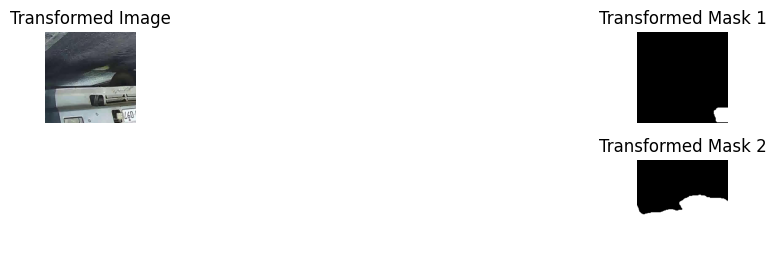

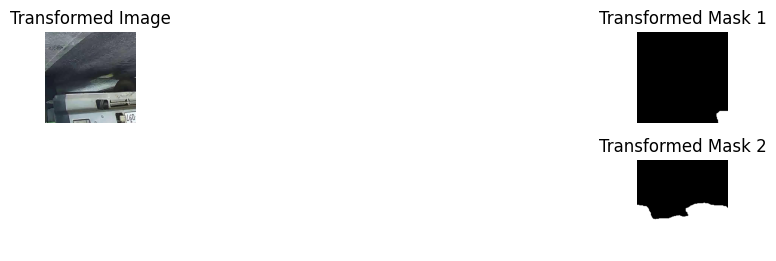

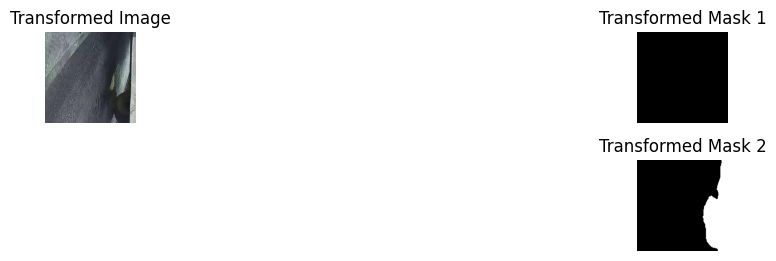

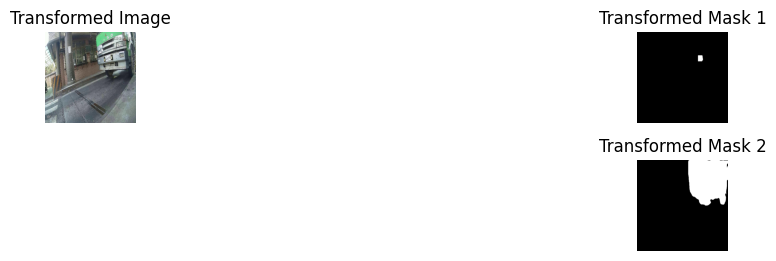

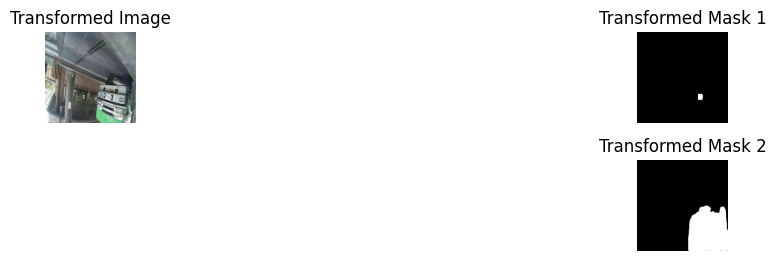

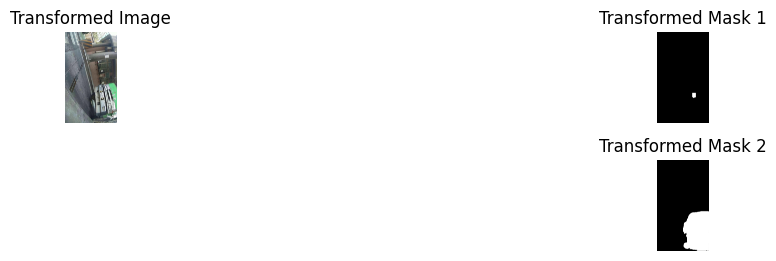

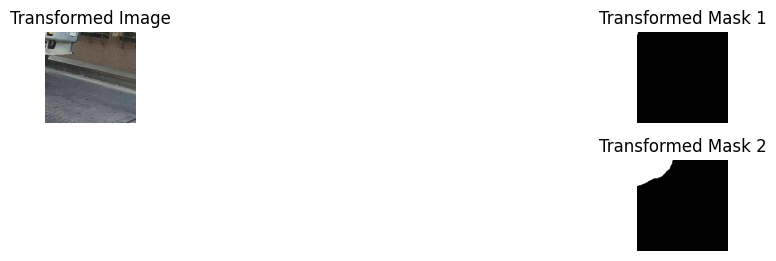

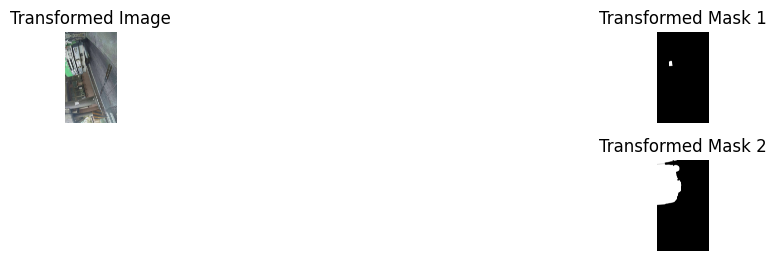

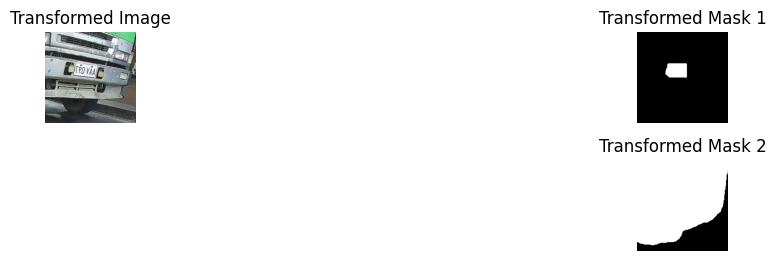

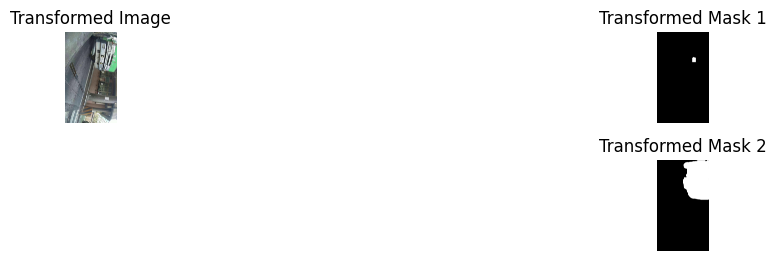

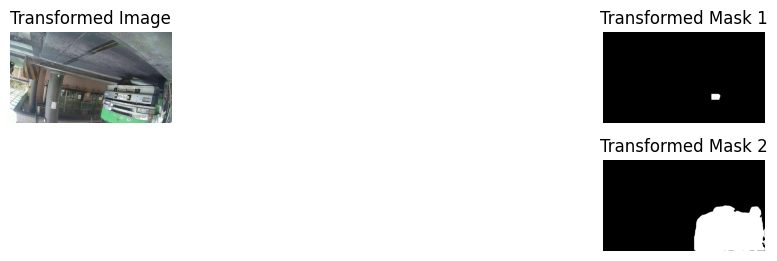

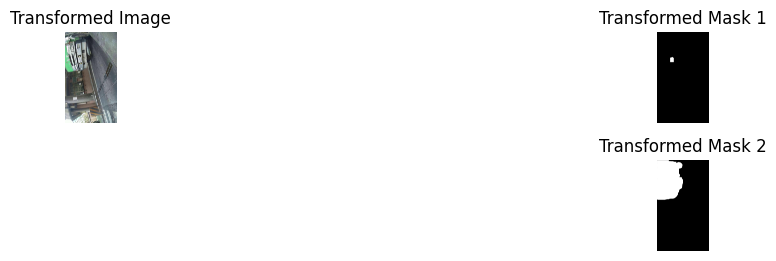

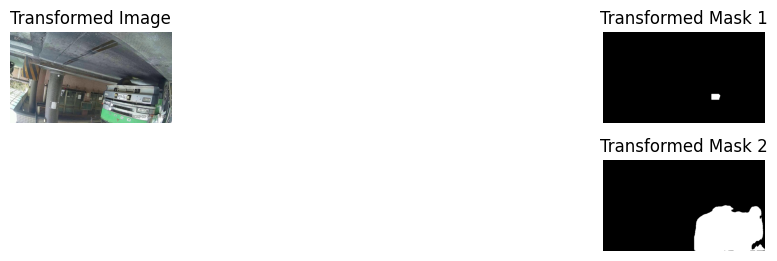

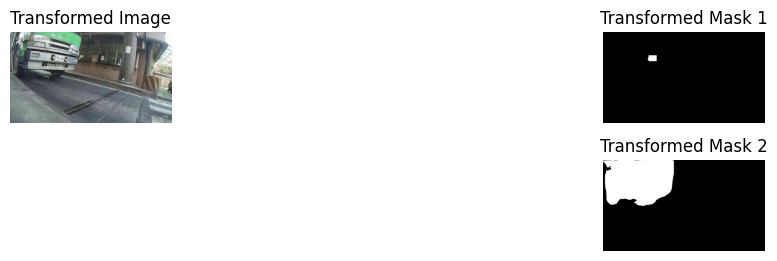

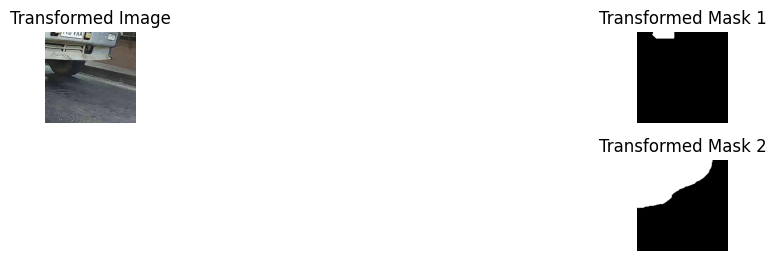

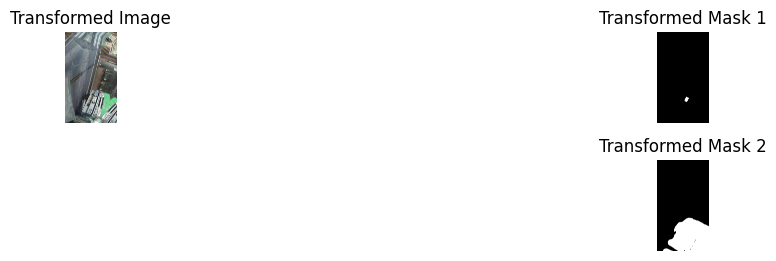

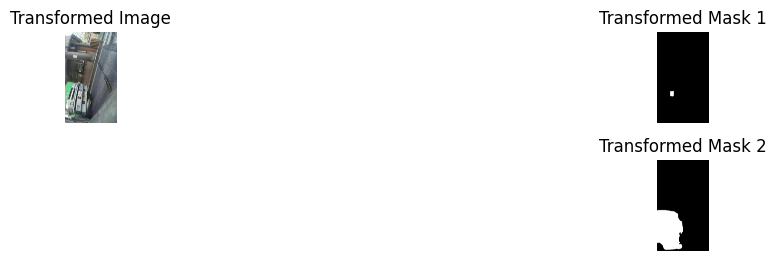

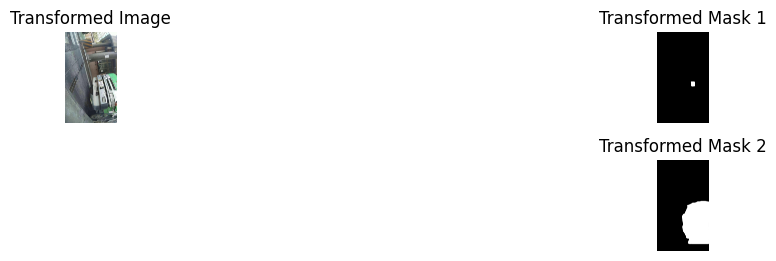

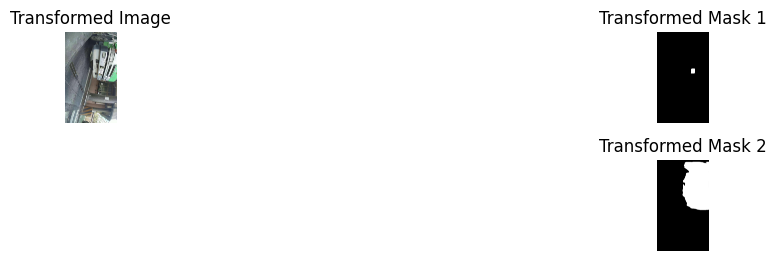

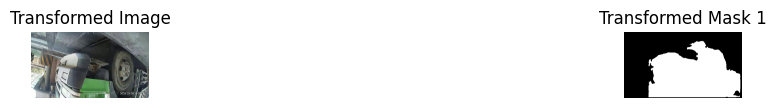

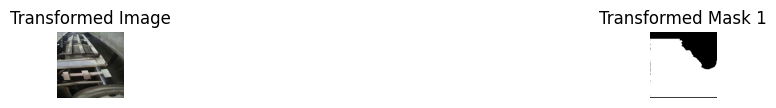

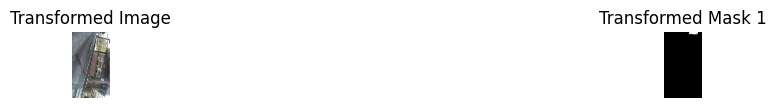

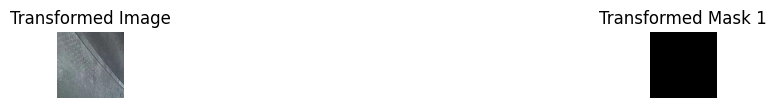

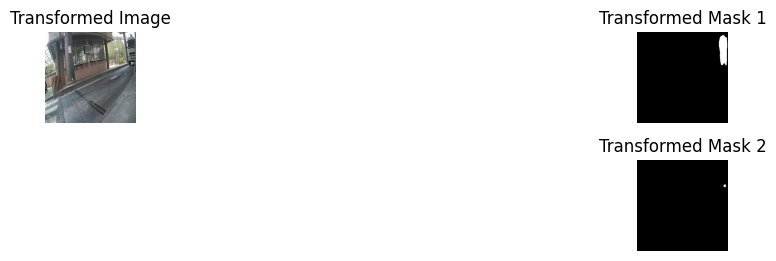

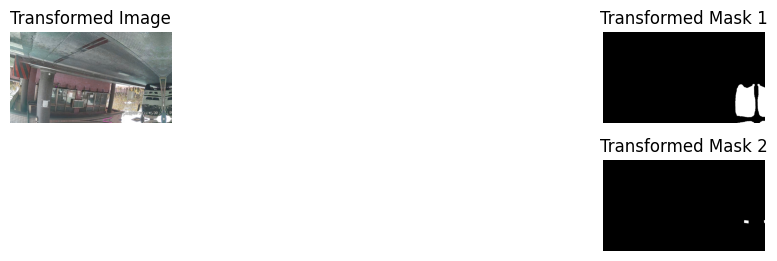

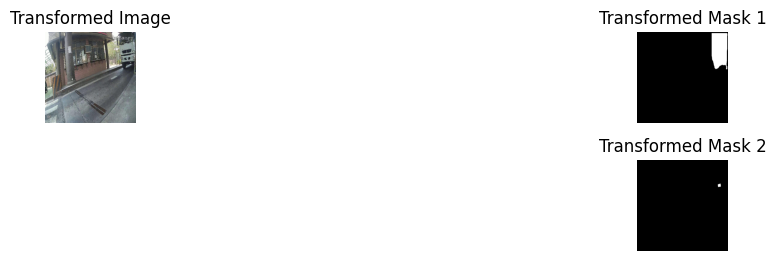

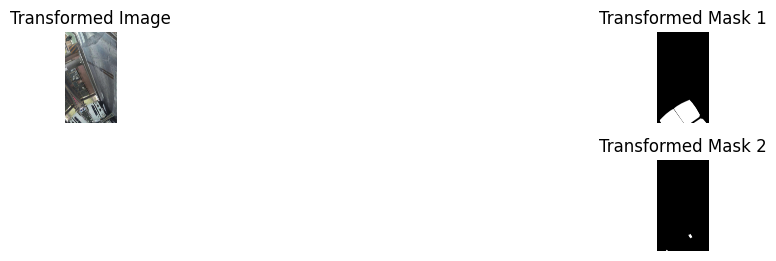

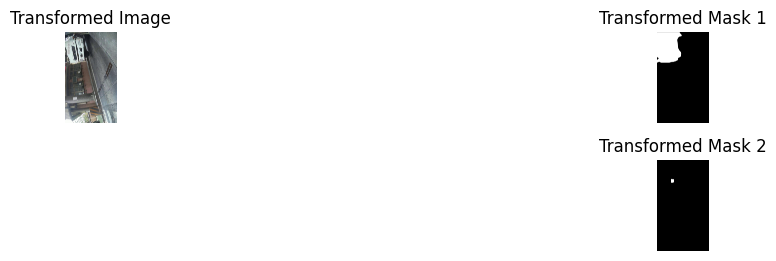

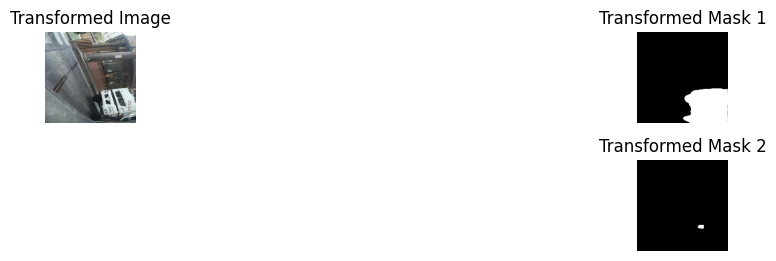

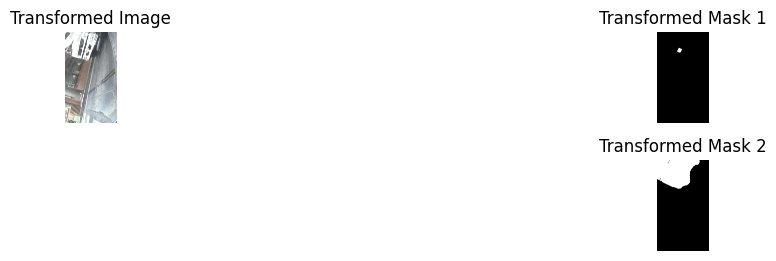

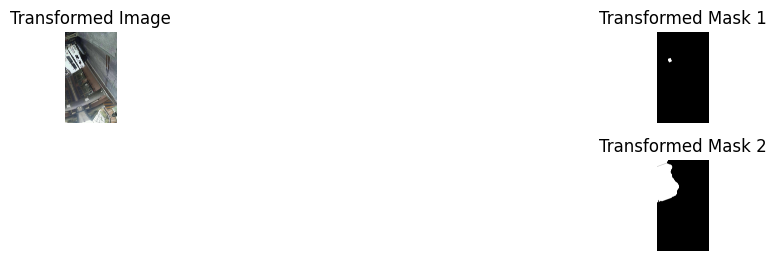

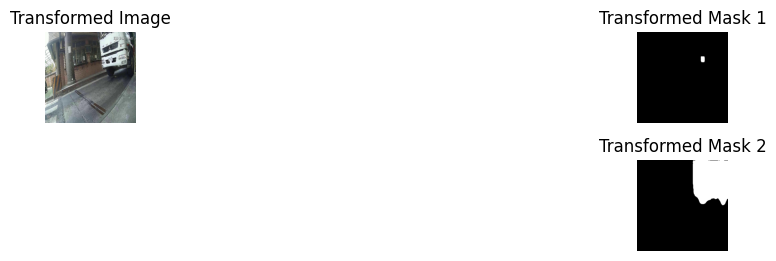

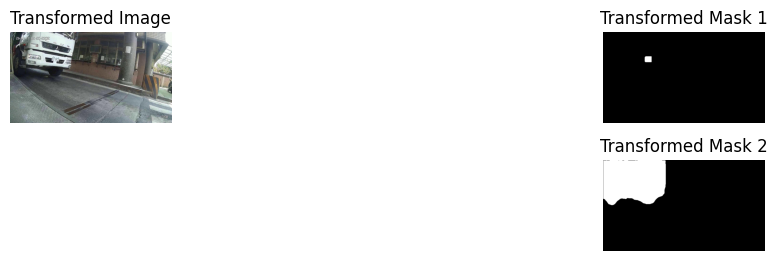

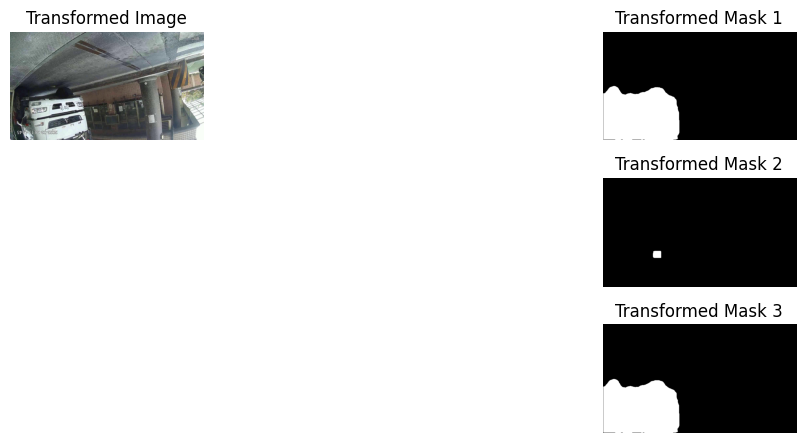

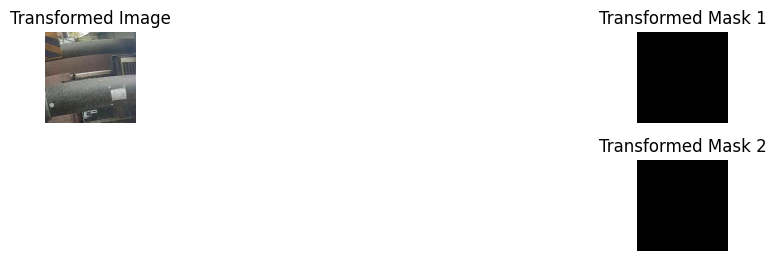

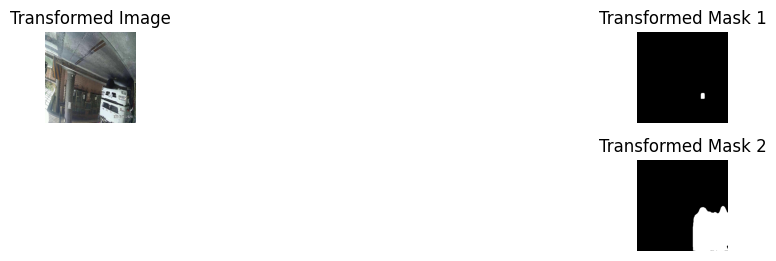

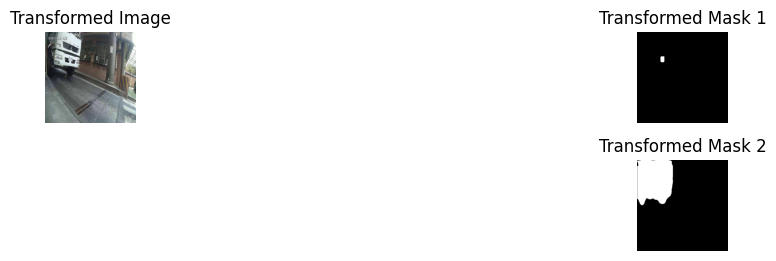

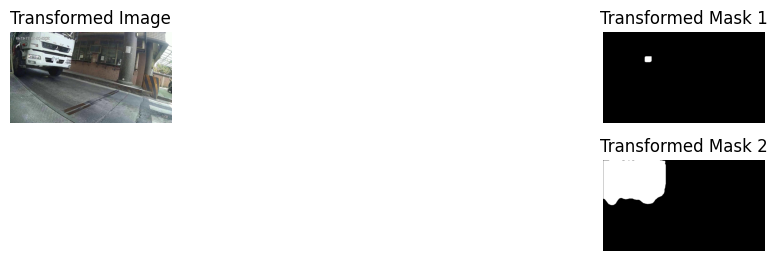

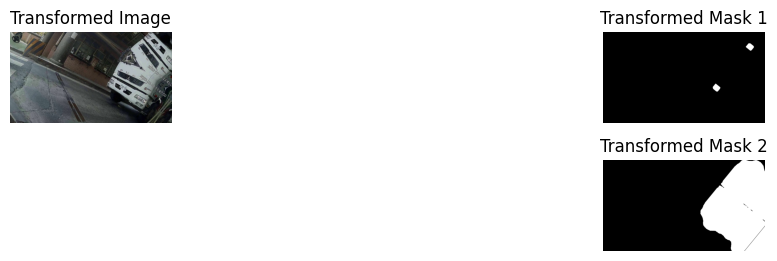

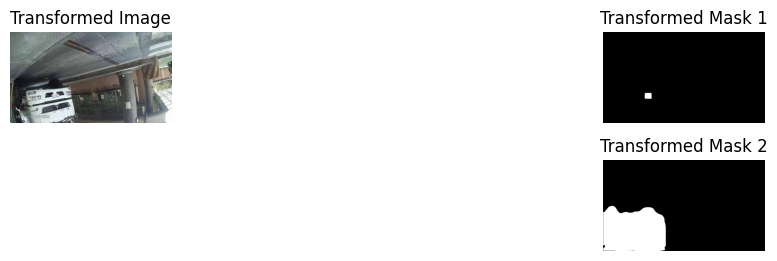

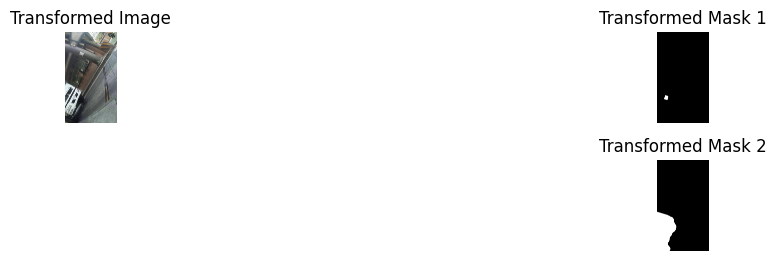

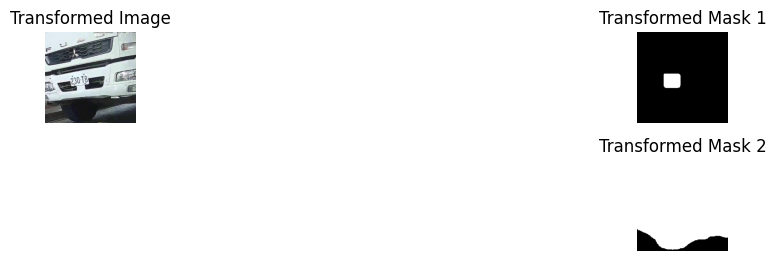

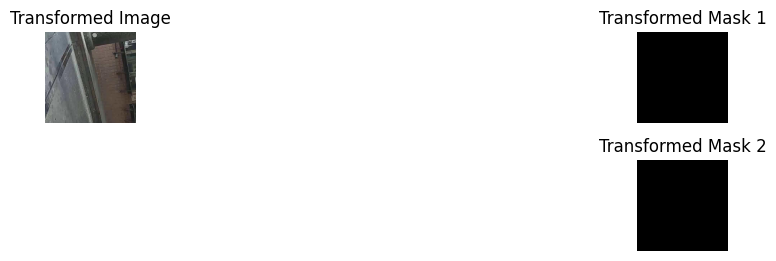

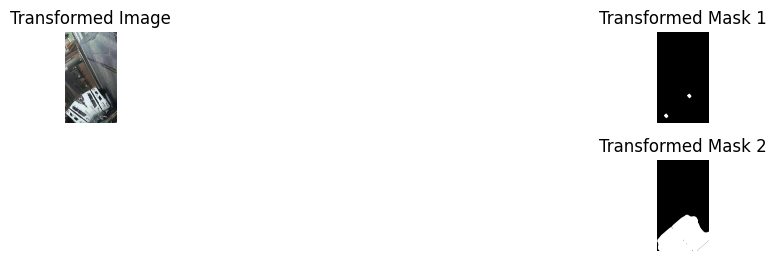

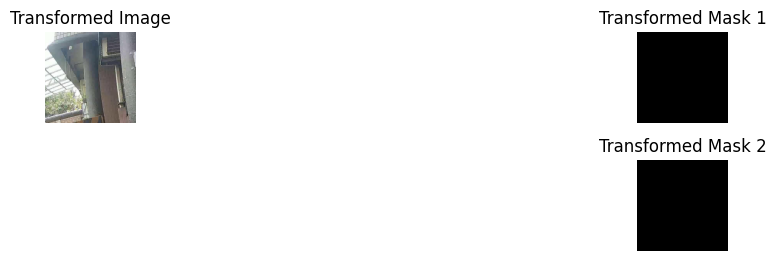

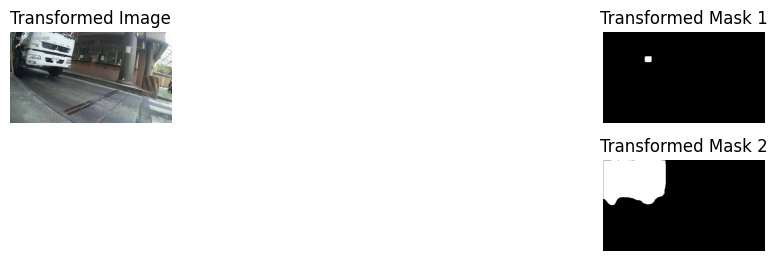

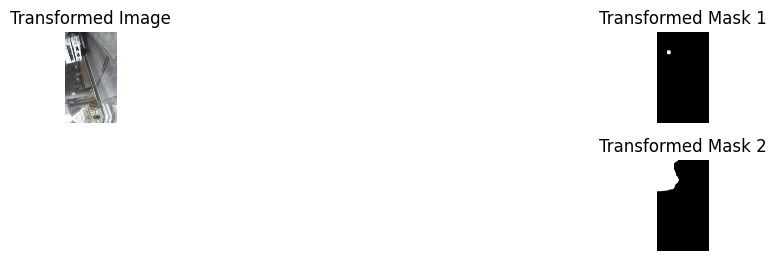

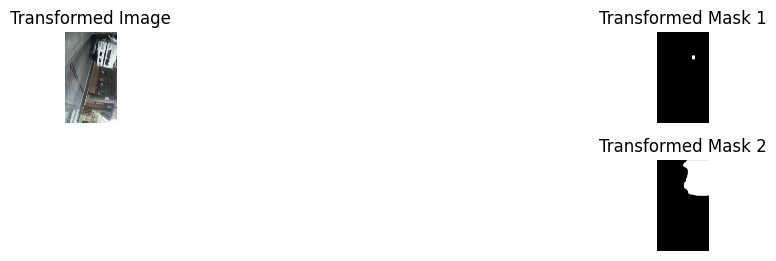

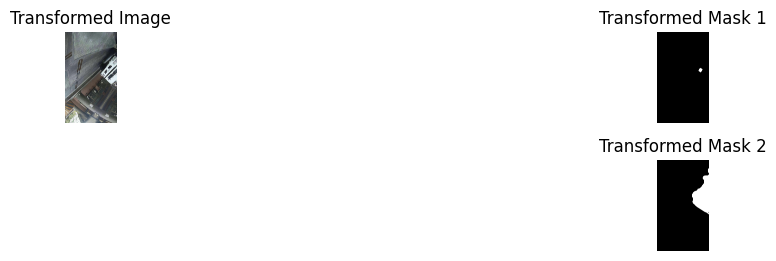

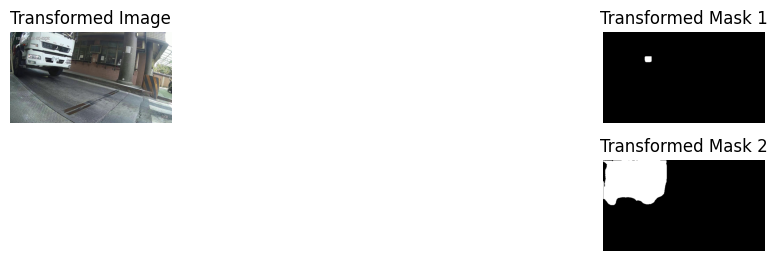

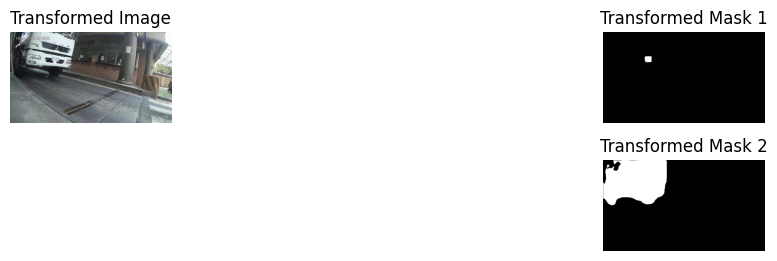

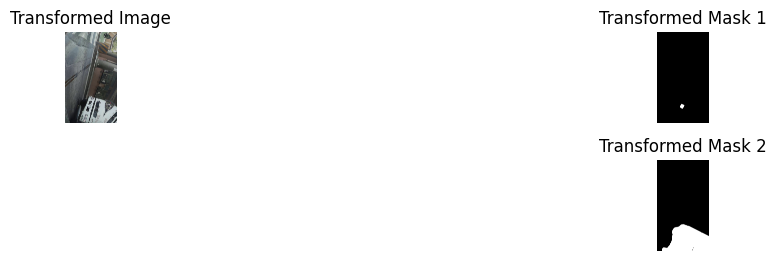

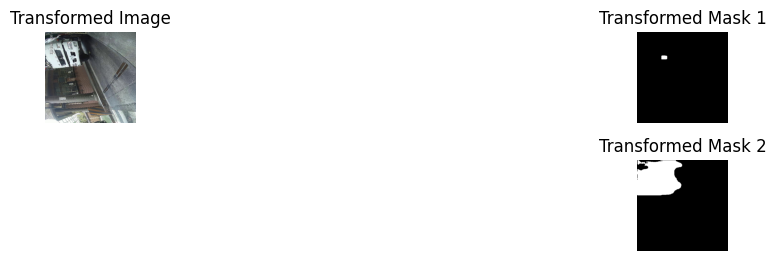

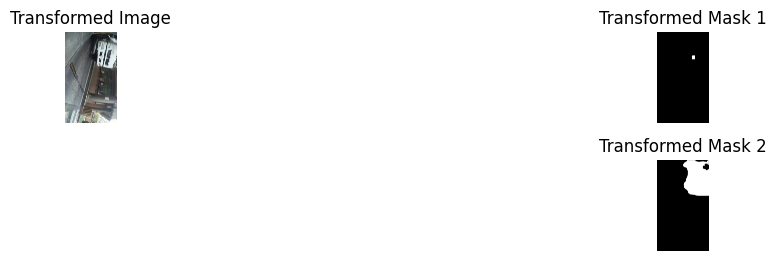

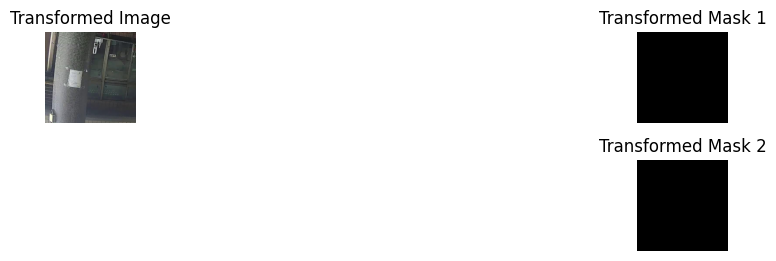

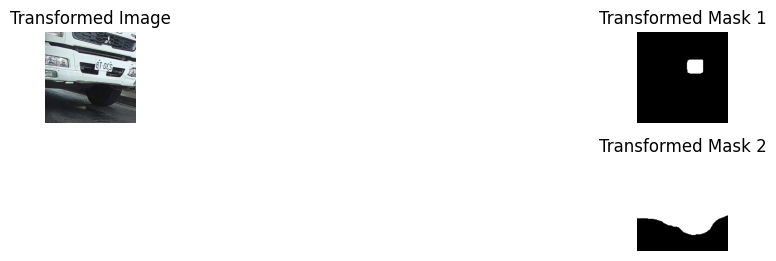

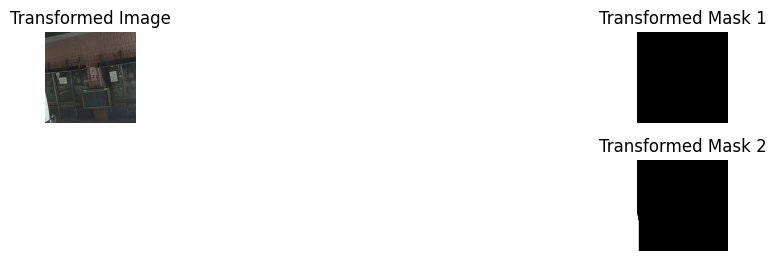

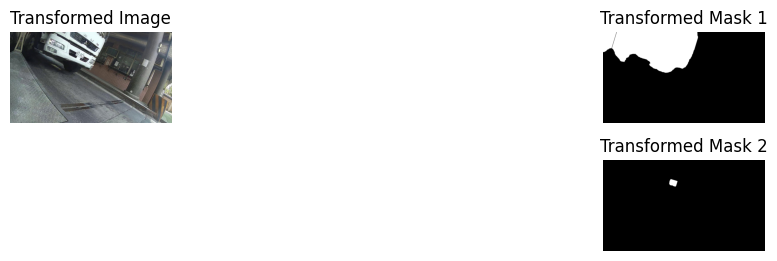

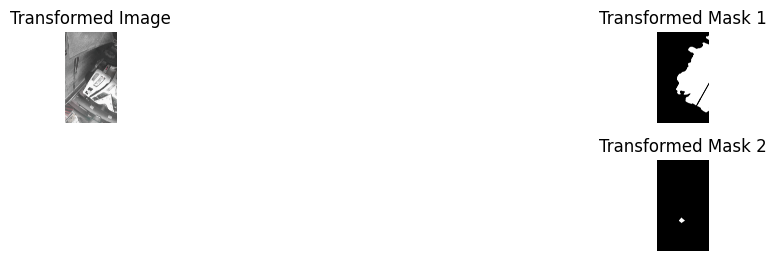

Done!50 images transformed
文件 wb_01yellow00000000.jpg 已重命名为 transformwb_01yellow00000000.jpg
文件 wb_01yellow00000001.jpg 已重命名为 transformwb_01yellow00000001.jpg
文件 wb_01yellow00000002.jpg 已重命名为 transformwb_01yellow00000002.jpg
文件 wb_01yellow00000003.jpg 已重命名为 transformwb_01yellow00000003.jpg
文件 wb_01yellow00000004.jpg 已重命名为 transformwb_01yellow00000004.jpg
文件 wb_01yellow00000005.jpg 已重命名为 transformwb_01yellow00000005.jpg
文件 wb_01yellow00000006.jpg 已重命名为 transformwb_01yellow00000006.jpg
文件 wb_01yellow00000007.jpg 已重命名为 transformwb_01yellow00000007.jpg
文件 wb_01yellow00000008.jpg 已重命名为 transformwb_01yellow00000008.jpg
文件 wb_01yellow00000009.jpg 已重命名为 transformwb_01yellow00000009.jpg
文件 wb_01yellow00000010.jpg 已重命名为 transformwb_01yellow00000010.jpg
文件 wb_01yellow00000011.jpg 已重命名为 transformwb_01yellow00000011.jpg
文件 wb_01yellow00000012.jpg 已重命名为 transformwb_01yellow00000012.jpg
文件 wb_01yellow00000013.jpg 已重命名为 transformwb_01yellow00000013.jpg
文件 wb_01yellow00000014.jpg 已重命名为 transformwb_01ye

In [10]:
# 將資料做數據增強

image_dir_path = export_dir + "/JPEGImages"
label_dir_path = export_dir + "/Labels"
output_path = "./datas/yolo/transform"

alimg.transform_image_label(image_dir_path,label_dir_path,output_path)

dir = output_path + "/JPEGImages"
add_prefix.add_prefix_to_images(dir, 'transform')

dir = output_path + "/Labels"
add_prefix.add_prefix_to_txts(dir, 'transform')

In [11]:
# 將資料切分成訓練集合驗證集

img_source_dir = "JPEGImages"
label_source_dir = "Labels"

data_path = "./datas/yolo/base"
train_path = "./datas/training/train/base"
valid_path = "./datas/training/valid/base"

split_data.split(data_path,train_path,valid_path,img_source_dir,label_source_dir)

data_path = "./datas/yolo/transform"
train_path = "./datas/training/train/transform"
valid_path = "./datas/training/valid/transform"

split_data.split(data_path,train_path,valid_path,img_source_dir,label_source_dir)

./datas/yolo/base\JPEGImages\wb_08white00000014.jpg ./datas/training/train/base\images\wb_08white00000014.jpg
./datas/yolo/base\Labels\wb_08white00000014.txt ./datas/training/train/base\labels\wb_08white00000014.txt
./datas/yolo/base\JPEGImages\wb_06white00000028.jpg ./datas/training/train/base\images\wb_06white00000028.jpg
./datas/yolo/base\Labels\wb_06white00000028.txt ./datas/training/train/base\labels\wb_06white00000028.txt
./datas/yolo/base\JPEGImages\wb_06white00000042.jpg ./datas/training/train/base\images\wb_06white00000042.jpg
./datas/yolo/base\Labels\wb_06white00000042.txt ./datas/training/train/base\labels\wb_06white00000042.txt
./datas/yolo/base\JPEGImages\wb_02yellow00000012.jpg ./datas/training/train/base\images\wb_02yellow00000012.jpg
./datas/yolo/base\Labels\wb_02yellow00000012.txt ./datas/training/train/base\labels\wb_02yellow00000012.txt
./datas/yolo/base\JPEGImages\wb_06white00000007.jpg ./datas/training/train/base\images\wb_06white00000007.jpg
./datas/yolo/base\Labe

In [12]:
# 將資料集資料整合並放到模型訓練預設位置

output_folder = "./datasets/custom/train/images"
first_folder = "./datas/training/train/base/images"
second_folder = "./datas/training/train/transform/images"

tool.merge_dir_data(first_folder,second_folder,output_folder)

output_folder = "./datasets/custom/train/labels"
first_folder = "./datas/training/train/base/labels"
second_folder = "./datas/training/train/transform/labels"

tool.merge_dir_data(first_folder,second_folder,output_folder)

output_folder = "./datasets/custom/valid/images"
first_folder = "./datas/training/valid/base/images"
second_folder = "./datas/training/valid/transform/images"

tool.merge_dir_data(first_folder,second_folder,output_folder)

output_folder = "./datasets/custom/valid/labels"
first_folder = "./datas/training/valid/base/labels"
second_folder = "./datas/training/valid/transform/labels"

tool.merge_dir_data(first_folder,second_folder,output_folder)



資料夾檔案合併完成： ./datasets/custom/train/images
資料夾檔案合併完成： ./datasets/custom/train/labels
資料夾檔案合併完成： ./datasets/custom/valid/images
資料夾檔案合併完成： ./datasets/custom/valid/labels


In [13]:
# 將labels的坐標標準化

image_dir = "./datasets/custom/train/images"
label_dir = "./datasets/custom/train/labels"
output_dir = "./datasets/custom/train/labels"

tool.process_labels(image_dir,label_dir,output_dir)

image_dir = "./datasets/custom/valid/images"
label_dir = "./datasets/custom/valid/labels"
output_dir = "./datasets/custom/valid/labels"

tool.process_labels(image_dir,label_dir,output_dir)

標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000001.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000002.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000003.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000004.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000006.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000007.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000008.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000009.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000011.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000012.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000013.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000014.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000015.txt
標籤處理完成: ./datasets/custom/train/labels\transformwb_01yellow00000

In [14]:
# 開始訓練

model_output_path = "./runs/segment/train"
data_yaml_path = "./data.yaml"

if __name__ == "__main__":
    # yaml裡面的data路徑從datasets開始
    train.train_model(model_output_path,data_yaml_path,epochs=150)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\train\labels...:   0%|          | 0/240 [00:00<?, ?it/s]Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\train\labels... 81 images, 4 backgrounds, 0 corrupt:  34%|███▍      | 81/240 [00:00<00:00, 801.42it/s]Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\train\labels... 163 images, 8 backgrounds, 0 corrupt:  68%|██████▊   | 163/240 [00:00<00:00, 794.63it/s]Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\train\labels... 240 images, 8 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<00:00, 811.95it/s]


train: New cache created: C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\valid\labels...:   0%|          | 0/60 [00:00<?, ?it/s]Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\valid\labels... 1 images, 0 backgrounds, 0 corrupt:   2%|▏         | 1/60 [00:00<00:28,  2.04it/s]Scanning C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\valid\labels... 60 images, 1 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 121.38it/s]


val: New cache created: C:\Users\ggoch2\Desktop\Yolov8\datasets\custom\valid\labels.cache
Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.87G      1.194      7.504      3.697      1.271         76        640: 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


                   all         60        130    0.00325      0.489      0.137      0.116    0.00272      0.418     0.0126    0.00482

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.85G      1.093      3.894      2.993       1.18         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


                   all         60        130    0.00449      0.599      0.111       0.07    0.00363      0.484     0.0909     0.0412

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.85G      1.152      3.191      2.468      1.184         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         60        130       0.62     0.0517      0.216      0.163       0.62     0.0517       0.21      0.126

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.94G      1.082      2.616      2.025      1.117         54        640: 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.601      0.221      0.282       0.22      0.604      0.221      0.286      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150       2.9G      1.039       2.37       1.79      1.111         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         60        130      0.683      0.286      0.401      0.294      0.676      0.278      0.403      0.251

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.87G      1.001      2.083       1.56      1.069         62        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.628      0.301      0.395      0.295      0.619      0.313      0.389      0.248

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.84G     0.9997      2.083      1.484      1.066         77        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         60        130      0.677      0.413      0.534      0.391      0.735      0.328      0.524      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.89G      1.061      2.089       1.56       1.12         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         60        130        0.6      0.512      0.591      0.392      0.593      0.494      0.576      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.84G      1.011      2.025      1.383      1.084         75        640: 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         60        130      0.667      0.527      0.625      0.421      0.649      0.505      0.594      0.331

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.83G      1.022      2.108       1.41      1.097         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]


                   all         60        130      0.669        0.6      0.627      0.456      0.644      0.605      0.606      0.356

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.82G     0.9642      2.042       1.34      1.067         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         60        130      0.647      0.637      0.679      0.506      0.657      0.657      0.683      0.445

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.85G     0.9498      1.865      1.304      1.042         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         60        130      0.803      0.618      0.671      0.482      0.794      0.614      0.662      0.445

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150       2.8G     0.9304       1.86      1.271       1.05         77        640: 100%|██████████| 15/15 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


                   all         60        130      0.737      0.671       0.73      0.578      0.729      0.666      0.725      0.491

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.92G     0.9306      1.675      1.156      1.054         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         60        130      0.811      0.674      0.704      0.534       0.83       0.66      0.701      0.495

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.96G     0.8981      1.746      1.174      1.017         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


                   all         60        130      0.704      0.635      0.681      0.534      0.704      0.635      0.677      0.485

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150       2.9G     0.9127      1.868      1.125      1.034         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]


                   all         60        130      0.696       0.67      0.681      0.503      0.703      0.675      0.687      0.464

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.91G     0.8753      1.721      1.108      1.012         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]


                   all         60        130      0.794      0.703      0.726      0.555      0.797      0.707      0.722       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.89G     0.9197      1.941      1.108      1.042         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


                   all         60        130      0.856      0.586      0.701      0.546      0.849      0.579      0.701      0.482

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.87G     0.8961      1.728      1.084      1.024         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


                   all         60        130      0.852      0.708      0.763      0.587      0.852      0.708      0.766      0.521

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150       2.9G      0.877      1.678      1.014     0.9985         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         60        130      0.888      0.637      0.754       0.57      0.888      0.637      0.755      0.522

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.95G     0.8641      1.641      0.957     0.9912         42        640: 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


                   all         60        130       0.84      0.722       0.77      0.605       0.84      0.722      0.771      0.518

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.85G     0.9065      1.764     0.9982      1.024         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         60        130      0.877      0.632       0.74      0.561      0.877      0.632      0.737      0.505

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.85G     0.8845      1.752      1.002      1.015         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         60        130        0.8      0.703      0.745      0.589      0.787      0.692      0.733      0.513

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.89G     0.8221      1.708     0.9377     0.9801         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


                   all         60        130      0.875      0.689      0.751       0.59      0.875      0.689      0.753      0.513

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.84G     0.8219       1.56     0.8878     0.9888         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


                   all         60        130      0.887      0.703      0.808      0.605      0.887      0.703      0.799      0.534

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.83G     0.8646      1.631     0.9386      1.019         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         60        130      0.947      0.663      0.798      0.592      0.947      0.663      0.788      0.542

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150       2.8G     0.8282      1.588     0.8911      1.003         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         60        130      0.864      0.723      0.803      0.624      0.845      0.752      0.796      0.548

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150       2.9G     0.7981       1.58     0.8523     0.9759         94        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


                   all         60        130      0.918       0.71      0.833      0.661      0.918       0.71      0.825      0.578

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150       2.9G     0.7638      1.532     0.7808     0.9493         92        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130       0.93      0.727      0.827      0.666      0.916      0.717      0.817       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150       2.9G     0.8155      1.661     0.8614     0.9927         90        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]


                   all         60        130      0.914      0.706       0.81       0.63      0.914      0.706      0.796      0.549

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.84G     0.7444      1.584     0.8111     0.9598         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.855      0.747      0.794      0.624      0.855      0.747      0.781      0.558

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.93G     0.7404      1.481     0.7807     0.9595         54        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.869      0.632      0.721      0.556      0.869      0.632      0.707      0.496

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.78G     0.7746      1.442     0.7619     0.9744         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


                   all         60        130      0.903      0.716      0.754      0.604      0.932      0.705      0.754      0.532

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.86G     0.7651      1.499     0.7812     0.9758         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         60        130      0.909      0.689      0.779      0.615       0.92      0.698      0.784      0.535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150       2.9G      0.758       1.43     0.7181      0.961         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


                   all         60        130      0.944      0.744      0.822       0.65      0.944      0.744      0.818      0.589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.94G     0.7766      1.546     0.7593     0.9714         91        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130       0.93      0.746      0.837      0.639       0.93      0.746      0.835      0.568

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.93G     0.7922      1.484     0.7455     0.9641         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.964      0.756      0.847      0.641      0.964      0.756      0.838      0.561

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.89G     0.7778      1.422     0.7262     0.9777         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.874      0.742      0.832       0.61      0.867      0.737      0.812      0.535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.84G     0.7571      1.411     0.7386     0.9744         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.888      0.764      0.836      0.641      0.888      0.764      0.816      0.563

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.84G     0.7578      1.422     0.7295     0.9568         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.894      0.748      0.836      0.651      0.888      0.743      0.825      0.568

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.78G     0.7675      1.446     0.7607     0.9763         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.881      0.754      0.814      0.639       0.87      0.744      0.805       0.57

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.94G     0.7646      1.478     0.7537     0.9803         78        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


                   all         60        130      0.946      0.727      0.841      0.662      0.934      0.719      0.805      0.593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.92G     0.7424      1.342     0.6945     0.9616         74        640: 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.854       0.75      0.826      0.626      0.858      0.744      0.801      0.571

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.92G     0.7266      1.426     0.6925     0.9409         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


                   all         60        130      0.923      0.745      0.819      0.629      0.923      0.745      0.816      0.566

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.86G     0.7241      1.353     0.6686     0.9505         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.956      0.733      0.845       0.68      0.956      0.733      0.822      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.83G     0.6902      1.437     0.6721     0.9356         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130       0.83       0.77      0.832       0.66      0.817      0.761      0.817      0.583

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.86G     0.7095      1.403     0.7183     0.9471         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


                   all         60        130      0.901      0.775       0.84      0.677      0.895       0.77      0.829      0.595

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.86G     0.6982      1.417     0.6216     0.9442         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.928      0.732      0.851      0.688      0.946      0.731      0.842      0.628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.89G      0.708      1.402      0.645      0.924         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.973      0.707      0.858      0.676       0.96      0.698      0.831      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.91G     0.6994      1.347     0.6443     0.9324         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


                   all         60        130      0.927      0.751      0.862      0.684      0.927      0.751      0.845       0.63

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.84G     0.7094      1.356     0.6364     0.9463         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.892      0.805      0.852      0.696      0.899      0.789      0.846      0.634

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.93G     0.6736      1.352     0.6042     0.9324         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.918      0.802      0.864      0.697      0.928      0.785      0.851      0.623

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150       2.8G     0.6682      1.286     0.5982     0.9269         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.947      0.787       0.87      0.701      0.932      0.778      0.843      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.94G     0.7119      1.299     0.6407     0.9649         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.895      0.809      0.857      0.683      0.883      0.796      0.844      0.603

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.82G     0.6714      1.281     0.6028     0.9315         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.873      0.773      0.855       0.67      0.862      0.763      0.835      0.585

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150       2.8G     0.6656      1.261     0.5945      0.937         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130        0.9      0.767      0.855      0.664      0.902      0.759      0.844        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.84G     0.6503      1.267     0.5917     0.9274         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.913      0.756      0.861      0.688      0.895       0.74      0.839        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.82G      0.682      1.373     0.6345     0.9362         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.898      0.717       0.83      0.666      0.891      0.712      0.815       0.58

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.84G     0.6859      1.246     0.5978     0.9308         74        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.891      0.817      0.864        0.7      0.896      0.802      0.845      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.84G     0.6813      1.237     0.5875     0.9258         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.936      0.815      0.878      0.713      0.936      0.815      0.862      0.632

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.92G       0.68      1.236     0.5853     0.9369         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.957      0.768      0.877      0.705      0.972      0.777       0.88      0.628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150       2.9G     0.6669      1.259      0.601     0.9387         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.931        0.8      0.873      0.702      0.917      0.793      0.856      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.86G     0.6821      1.433     0.5959     0.9365         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.961      0.787      0.876      0.704      0.955       0.77      0.859      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.91G     0.6438      1.331     0.5924     0.9322         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.897      0.833      0.883      0.714      0.934      0.805      0.865      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150       2.9G     0.6511      1.291      0.557     0.9186         75        640: 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.911      0.825      0.881      0.705      0.912       0.84      0.876       0.64

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150       2.9G     0.6433       1.24     0.5551     0.9185         62        640: 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


                   all         60        130      0.937      0.792      0.883        0.7      0.937      0.792      0.877      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.88G     0.6278      1.205     0.5479     0.9037         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.914      0.815      0.876      0.702      0.943      0.773      0.852      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.79G     0.6227      1.147     0.5352     0.9177         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.899      0.822      0.876      0.688      0.965      0.765      0.853      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.87G     0.6402      1.175     0.5227     0.9246         71        640: 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.902      0.831      0.876      0.696      0.925      0.783       0.85      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.82G     0.6337      1.153     0.5375     0.9232         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.906      0.833       0.88      0.713      0.909      0.813      0.865      0.625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.82G     0.6105      1.221     0.5242      0.911         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.948       0.83      0.892      0.731      0.941      0.825      0.871      0.646

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.85G      0.648      1.313     0.5737     0.9242         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130       0.97      0.805      0.894      0.728      0.963      0.801      0.879      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.85G     0.6207      1.189     0.5371     0.9144         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.934      0.864      0.899      0.719      0.905       0.84      0.883      0.644

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.82G     0.6158      1.172     0.5195     0.9024         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.928      0.856      0.887       0.73       0.92       0.84      0.881      0.643

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.89G     0.6013      1.188     0.5239     0.9128         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.953      0.813      0.872      0.725      0.953      0.813      0.862      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.89G     0.6504      1.228     0.5417     0.9303         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.885      0.818      0.875      0.713      0.885      0.818      0.874       0.65

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.83G     0.6171      1.269     0.5358     0.9205         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.855      0.833      0.887      0.728      0.872      0.837      0.882      0.635

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.87G     0.6189      1.169     0.5215     0.9226         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.951      0.772      0.883      0.721      0.952      0.772      0.875      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.89G     0.6132      1.253     0.5329     0.9068         74        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.959      0.802      0.885      0.713      0.952      0.797      0.866      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.83G     0.5887      1.121     0.5126     0.9051         74        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         60        130      0.879      0.878      0.892      0.723      0.945      0.784      0.865      0.646

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.85G     0.5854      1.099     0.4959     0.8985         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.936       0.81      0.881      0.728      0.956      0.784      0.859       0.66

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.85G     0.6018      1.155     0.4977     0.8974         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.905      0.842      0.883      0.724       0.89      0.799      0.855      0.641

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.86G     0.6089      1.307     0.5359     0.8987         81        640: 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.888      0.847      0.874      0.711      0.898      0.815      0.861      0.623

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.82G     0.5697      1.142     0.4875     0.8951         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.911      0.839      0.885      0.739      0.936      0.805      0.868      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.86G     0.5493      1.097      0.468     0.8924         80        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.943      0.799      0.875      0.739      0.981      0.779      0.873      0.664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.93G     0.5972      1.108     0.4764     0.9126         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.946      0.827      0.892      0.746      0.953        0.8       0.88      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.82G     0.5921      1.201     0.4795     0.9235         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130       0.92       0.82      0.894      0.742      0.914      0.804      0.884      0.658

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.02G     0.6208      1.121      0.495     0.9249         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.877      0.828       0.89      0.728      0.942      0.767      0.881      0.646

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150       2.9G     0.5853      1.153     0.4679     0.9119         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.892      0.836      0.878       0.72      0.919      0.797      0.861      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150       2.8G      0.557      1.063     0.4414     0.8901         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.958      0.762      0.872      0.721      0.968      0.766      0.867      0.654

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.86G     0.5923      1.158     0.4854     0.9176         71        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.902      0.824      0.885      0.727      0.978      0.764      0.875      0.655

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.85G     0.5931       1.05     0.4614      0.908         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.938      0.828       0.89      0.724      0.935      0.821       0.88       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.88G     0.5587      1.057     0.4612     0.8954         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.964      0.833      0.899      0.734      0.957       0.82      0.881      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.91G     0.5964      1.145     0.4633      0.912         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.951       0.84      0.891      0.731      0.963      0.831      0.872      0.644

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.82G     0.5826      1.125     0.4784     0.9118         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.949      0.834      0.881      0.734       0.95      0.834      0.867      0.654

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.91G     0.5699      1.134     0.4469     0.9045         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.967      0.831      0.884      0.737      0.967      0.831      0.871      0.651

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.97G     0.5665      1.091     0.4478     0.9049         54        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.964      0.819      0.893      0.744      0.964      0.819      0.879      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150       2.8G     0.5762      1.121     0.4634     0.9081         62        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.944      0.827      0.893      0.755      0.936      0.826      0.868      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.87G     0.5785      1.119     0.4555     0.8978         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.955      0.814      0.885      0.747      0.946      0.805       0.87      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.82G     0.5281      1.028     0.4133     0.8791         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.956      0.833      0.892       0.74      0.952      0.826      0.883      0.671

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.96G     0.5487      1.065     0.4459      0.895         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.962      0.833      0.896      0.742      0.959      0.821      0.887      0.671

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.83G      0.551      1.044     0.4587     0.8964         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.974      0.838      0.898      0.736      0.978      0.822      0.879      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.94G     0.5574      1.016     0.4513     0.9106         64        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.978      0.817      0.894      0.736      0.979      0.816       0.87      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.82G      0.567      1.099     0.4368      0.912         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


                   all         60        130       0.97      0.793      0.888      0.737       0.97      0.793      0.868      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.92G      0.541      1.207     0.4403     0.8871         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


                   all         60        130      0.962      0.814      0.889      0.745      0.972      0.802      0.878      0.644

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.85G      0.533      1.075     0.4242     0.8869         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         60        130      0.966      0.827      0.894      0.747      0.971      0.811      0.875      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.92G     0.5456      1.061     0.4249     0.8878         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.972      0.831      0.896      0.746      0.966      0.825      0.882      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.86G     0.5522      1.116     0.4385     0.8932         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.958      0.858      0.903      0.744      0.973      0.837      0.889      0.667

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.89G     0.5505      1.032     0.4335     0.9022         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


                   all         60        130      0.959      0.856      0.912      0.752      0.974      0.833      0.901      0.672

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.84G     0.5122     0.9684     0.4042     0.8822         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.973      0.835      0.911      0.755      0.971      0.828      0.904      0.684

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.85G       0.53      1.008     0.4046     0.8903         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.991      0.814      0.911      0.758      0.991      0.814        0.9      0.686

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.81G     0.5264      1.001      0.413     0.8895         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.984      0.812      0.905      0.752      0.986       0.81      0.903      0.676

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.93G     0.5431     0.9997      0.427      0.879         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.947      0.853      0.905      0.757      0.974      0.821      0.896      0.651

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.92G     0.5375       1.08     0.4325     0.8905         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         60        130       0.96      0.849      0.905      0.744      0.976      0.826      0.893      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.89G     0.5508      1.108      0.442     0.8956         96        640: 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.962      0.822      0.897      0.737      0.957      0.816      0.881      0.656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.85G     0.5488       1.02     0.4426     0.9098         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


                   all         60        130      0.941      0.832      0.892      0.732      0.935      0.826      0.878      0.643

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.92G     0.5012     0.9728     0.3968      0.874         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.937      0.831      0.885      0.739      0.933      0.824      0.879      0.658

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.82G     0.5321     0.9569     0.4077     0.8926         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130       0.94       0.83      0.888      0.746      0.951      0.822      0.883      0.676

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.92G     0.5261       1.04     0.4209     0.8873         86        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


                   all         60        130      0.935      0.846      0.899      0.741      0.945      0.821      0.891       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.85G     0.5116     0.9735     0.3964     0.8948         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.936      0.852      0.909      0.745      0.918      0.835      0.889      0.666

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.94G     0.5219     0.9864     0.4024     0.8811         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.935      0.841       0.91       0.75      0.945      0.808      0.894      0.672

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.83G     0.4967     0.9841     0.3953     0.8764         80        640: 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         60        130      0.946      0.844      0.914      0.752      0.964      0.814      0.894       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.93G     0.5151     0.9926     0.4049     0.8818         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         60        130      0.952      0.846       0.91      0.753      0.964      0.812      0.892      0.678

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.85G     0.5112      1.059     0.3984     0.8804         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.943       0.85      0.908      0.753      0.958      0.824      0.897      0.688

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.82G     0.4897     0.9168     0.3737      0.881         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.939      0.853      0.907       0.75      0.952       0.83      0.894      0.675

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.83G     0.5042     0.9915     0.3972     0.8857         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.947      0.847       0.91      0.756      0.945      0.831      0.901      0.678

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.82G     0.4904     0.9652     0.3759     0.8782         86        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.932       0.86       0.91      0.755      0.966      0.804      0.893       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.87G        0.5     0.9139     0.4075     0.8873         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.924      0.863      0.909      0.758      0.943      0.826        0.9      0.672

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.87G     0.5025     0.9744     0.3944     0.8736         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.932      0.859      0.906      0.757      0.928      0.844      0.892      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.89G      0.479      1.004     0.3967     0.8763         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.929      0.861      0.902      0.758      0.907      0.834      0.879      0.655

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.85G     0.4989      0.974     0.3764     0.8741         64        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.914      0.863      0.899      0.764      0.962      0.789      0.874      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.87G     0.4813     0.8882     0.3613     0.8738         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         60        130      0.925      0.877      0.911       0.77      0.922      0.835      0.881      0.653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.84G     0.4953      1.012     0.4059     0.8787         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         60        130      0.923      0.878      0.911      0.764       0.93      0.851      0.898      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.92G     0.5231     0.9599     0.3984     0.9021         62        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.944      0.855      0.913      0.766      0.944      0.826      0.895      0.687

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.83G      0.497     0.9474     0.3765     0.8728         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.951      0.862      0.911      0.769      0.928      0.835      0.891      0.681

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.82G       0.47     0.9323     0.3679     0.8668         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


                   all         60        130      0.936      0.867      0.917      0.767      0.976      0.818      0.893      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.91G     0.4925      1.003     0.3855     0.8659         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         60        130      0.927      0.876      0.915      0.769      0.958      0.823      0.895       0.66

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.92G     0.4786     0.9703     0.3671     0.8809         76        640: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.918      0.887       0.92      0.765      0.945       0.83      0.895      0.676

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.77G     0.4878     0.9446     0.3755     0.8685         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         60        130      0.956      0.868      0.915      0.758      0.939      0.853      0.906      0.683

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.94G     0.4806     0.9392     0.3641     0.8764         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         60        130      0.957      0.865      0.918      0.762      0.934      0.843      0.884      0.677
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.87G     0.4622     0.9538     0.3985     0.8653         31        640: 100%|██████████| 15/15 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         60        130      0.961      0.857      0.914      0.766      0.963      0.825      0.887      0.671

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.84G     0.4664     0.9393     0.3611     0.8539         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130       0.96      0.855      0.912      0.763      0.976      0.818       0.88       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.75G     0.4474     0.8637     0.3562     0.8609         38        640: 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         60        130      0.963      0.839      0.907      0.755      0.978      0.809      0.879      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.73G       0.43     0.8921     0.3356     0.8388         31        640: 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         60        130      0.968      0.845      0.906      0.751       0.95      0.831      0.879      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.81G     0.4374     0.8836     0.3467     0.8594         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


                   all         60        130      0.965      0.838      0.904      0.754       0.97      0.812      0.882      0.672

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.73G     0.4277     0.8769     0.3345     0.8433         31        640: 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


                   all         60        130      0.962      0.839      0.903      0.755      0.973      0.812      0.884      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.72G     0.4169     0.8525     0.3322     0.8374         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         60        130      0.965      0.838      0.905      0.757      0.961       0.82      0.882      0.666

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.73G     0.4237     0.8275     0.3242     0.8481         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


                   all         60        130      0.968      0.837      0.908      0.761      0.962      0.823      0.885      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.77G     0.4162     0.8366     0.3248     0.8447         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         60        130      0.969      0.837       0.91      0.763      0.962      0.826      0.883      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.72G     0.4329     0.9006     0.3241       0.85         40        640: 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


                   all         60        130      0.974      0.842      0.911      0.766      0.963      0.828      0.888      0.664

150 epochs completed in 0.199 hours.
Optimizer stripped from runs\segment\train\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train\weights\best.pt, 6.8MB

Validating runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]


                   all         60        130      0.944      0.855      0.912      0.765      0.944      0.826      0.897      0.688
            yellow_car         60         29      0.872      0.828      0.933       0.81      0.888      0.828      0.921      0.712
             green_car         60         20      0.979        0.9        0.9      0.784      0.994        0.9      0.908      0.752
             white_car         60         27      0.926      0.926      0.923      0.876       0.92      0.858      0.885      0.763
                linces         60         54          1      0.765      0.893      0.593      0.975      0.717      0.873      0.525
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\segment\train
training time : 789.4725143909454 seconds
Ultralytics YOLOv8.0.232 🚀 Python-3.10.5 torch-2.1.1+cu118 CPU (12th Gen Intel Core(TM) i7-12700F)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12

In [2]:
# 播放影片測試

# model = YOLO("models/wb/v1.0/weights/best.pt")
model = YOLO("runs/segment/train/weights/best.pt")

# video_player = VideoPlayer("datas/videos/Barataria Morvant Exit.mp4")
video_player = VideoPlayer("wbdatas/wb_videos/yellow/2.mp4")

def predict(frame):
    img = frame[:, :, ::-1].copy()  # 转换颜色空间
    # results = model.predict(img, save=False)
    results = model.track(img, conf=0.3, iou=0.5,persist=True)
    return results[0].plot()

video_player.play(predict)


0: 384x640 (no detections), 188.1ms
Speed: 0.0ms preprocess, 188.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.3ms
Speed: 6.4ms preprocess, 15.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.3ms
Speed: 0.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.2ms
Speed: 0.0ms preprocess, 13.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.9ms
Speed: 8.2ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.6ms
Speed: 0.0ms preprocess, 22.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 white_car, 12.1ms
Speed: 14.0ms preprocess, 12.1ms in

In [8]:
# 將影片切成圖檔

video_path = "./wbdatas/wb_videos/yellow/2.mp4"

video2img.toimg(video_path,"wb_02yellow")


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 46.80it/s]


In [9]:
# 利用產生的模型對剛剛的圖檔做標記

model_path = "models/wb/v1.0/weights/best.pt"
result_video_path = "./wbdatas/wb_videos/yellow/2"
output_dir = "./datas/labelmecheck"

predict2labelme_json.predict_result_to_labelme_datas(
    model_path, result_video_path, output_dir
)


image 1/1 C:\Users\ggoch2\Desktop\Yolov8\wbdatas\wb_videos\yellow\2\wb_02yellow00000000.jpg: 384x640 (no detections), 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\ggoch2\Desktop\Yolov8\wbdatas\wb_videos\yellow\2\wb_02yellow00000001.jpg: 384x640 (no detections), 33.9ms
Speed: 20.1ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\ggoch2\Desktop\Yolov8\wbdatas\wb_videos\yellow\2\wb_02yellow00000002.jpg: 384x640 (no detections), 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\ggoch2\Desktop\Yolov8\wbdatas\wb_videos\yellow\2\wb_02yellow00000003.jpg: 384x640 (no detections), 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\ggoch2\Desktop\Yolov8\wbdatas\wb_videos\yellow\2\wb_02yellow00000004.jpg: 384x640 (no detec